# <center>Data Mining Project Code</center>

** **
## <center>*02 - XXXXXXXX*</center>

** **

Consumers today are becoming more selective about where they buy their products and where they spend their money. Consequently, it is essencial for companies to better understand their clients, being able to tailor sales and discounts to certain groups of customers.

Knowing this, the goal of this project is to divide customers of `ABCDEats Inc.` into smaller groups, whose clients have similar characteristics and purchasing behaviours.

The second  notebook of this project consists of the .......

This project was presented to the `TargetSphere Advisors`, a group of Consultants, Business Analysts and Data Scientists who focus on delivering Customer Segementation solutions for small and medium-sized businesses.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
2. [Data Cleansing](#2.-Data-Cleansing) <br><br>
    2.1 [Filling the missing values](#2.1-Filling-the-missing-values) <br><br>
    2.2 [Outlier Treatment](#2.2-Outlier-Treatment)<br><br>
3. [Feature Selection](#-3.-Feature-Selection)<br><br>
    3.1 [Univariate variables](#3.1.-Univariate-variables)<br><br>
    3.2 [Spearman Correlation](#3.2-Spearman-Correlation)


 

# 1. Importing Libraries & Data

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# To fill the missing values
from sklearn.impute import KNNImputer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import external '.py' file containing the functions created and used for this analysis
import functions as f

In [2]:
dataset_name = 'preprocessed_data'

data = pd.read_csv(f'data/{dataset_name}.csv', index_col = "customer_id")
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_18_ratio,HR_19_ratio,HR_20_ratio,HR_21_ratio,HR_22_ratio,HR_23_ratio,0_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,DELIVERY,DIGI,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0
5d272b9dcb,8670,17.0,2,2,2,0,1,DISCOUNT,DIGI,12.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0
f6d1b2ba63,4660,38.0,1,2,2,0,1,DISCOUNT,CASH,9.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0


In [3]:
data['customer_region'] = data['customer_region'].replace(0, '0000')

In [4]:
data['customer_region'] = data['customer_region'].astype(str)

In [5]:
data['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '0000', '4140', '2490', '8370',
       '8550'], dtype=object)

<br>

# 2. Data Cleansing

## 2.1 Filling the missing values

In the previous notebook, we noticed that there were 3 columns with missing values: `customer_age`, `first_order` and `HR_0`. For the feature `first_order` we considered filling the missing values with 0, given that in these rows the last order had values of 0, meaning that the customer made their first and last order on the day that the dataset started. The last variable was deleted, since new features were created. Previously, we used the median for the feature `customer_age`, but in this notebook we will fill with the K nearest neighbor imputer.

In [6]:
# pd.set_option('display.max_rows', None)

In [7]:
# data.isna().sum()

customer_region                   0
customer_age                      0
vendor_count                      0
product_count                     0
is_chain                          0
first_order                       0
last_order                        0
last_promo                        0
payment_method                    0
CUI_American                      0
CUI_Asian                         0
CUI_Beverages                     0
CUI_Cafe                          0
CUI_Chicken Dishes                0
CUI_Chinese                       0
CUI_Desserts                      0
CUI_Healthy                       0
CUI_Indian                        0
CUI_Italian                       0
CUI_Japanese                      0
CUI_Noodle Dishes                 0
CUI_OTHER                         0
CUI_Street Food / Snacks          0
CUI_Thai                          0
DOW_0                             0
DOW_1                             0
DOW_2                             0
DOW_3                       

From the output above we can see that there are missing values in `avg_order_hour` and `days_between`, the reason for this is because for 235 customers there is no values in the hours feature.

**customer_age**

First, we are going to check the variables that have a higher correlation with `customer_age`. Doing this, we can use these variables to predict the missing value using the KNN Imputer.

numeric_data = data.select_dtypes(include=['int64', 'float64'])
final_data = numeric_data.loc[:, ~(numeric_data.isin([0, 1]).all())]

corr = final_data.corr(method="pearson")

# Selecting correlations for 'customer_age'
target_variable = 'customer_age'
if target_variable in corr:
    correlations = corr[target_variable].dropna()

    most_correlated = correlations.abs().sort_values(ascending=False)

    print("Most correlated variables with customer_age:")
    print(most_correlated)
else:
    print(f"'{target_variable}' is not in the numeric dataset.")

# Selecting the top 6 correlated variables
top_correlated = most_correlated[1:7].index.tolist()

# Creating a new DataFrame with only the most correlated variables
selected_data = data[top_correlated + ['customer_age']]

# Applying KNN Imputer only to these variables
knn_imputer = KNNImputer(n_neighbors=10)
imputed_data = knn_imputer.fit_transform(selected_data)

# Replacing the imputed values in the original DataFrame
data['customer_age'] = imputed_data[:, selected_data.columns.get_loc('customer_age')].round().astype(int)

data['customer_age'].isna().sum()

<br>

**first_order**

Given the insights taken on the previous notebook, we will replace all missing values of the feature `first_order` to 0.

data['first_order'] = data['first_order'].fillna(0)

<br>

**days_between**

Since the days_between variable has missing values due to first_order, and we filled the missing values in first_order with 0, the days_between will also be 0, as the last_order is 0 when first_order was initially missing.

data['days_between'] = data['days_between'].fillna(0)

<br>

**avg_order_hour**

numeric_data = data.select_dtypes(include=['int64', 'float64'])
final_data = numeric_data.loc[:, ~(numeric_data.isin([0, 1]).all())]

corr = final_data.corr(method="pearson")

# Selecting correlations for 'avg_order_hour'
target_variable = 'avg_order_hour'
if target_variable in corr:
    correlations = corr[target_variable].dropna()

    # Sorting in descending order by absolute value
    most_correlated = correlations.abs().sort_values(ascending=False)

    print("Most correlated variables with avg_order_hour:")
    print(most_correlated)
else:
    print(f"'{target_variable}' is not in the numeric dataset.")

# Selecting the top 5 correlated variables 
top_correlated = most_correlated[1:6].index.tolist()

# Creating a new DataFrame with only the most correlated variables
selected_data = data[top_correlated + ['avg_order_hour']]

# Applying KNN Imputer only to these variables
knn_imputer = KNNImputer(n_neighbors=10)
imputed_data = knn_imputer.fit_transform(selected_data)

# Replacing the imputed values in the original DataFrame
data['avg_order_hour'] = imputed_data[:, selected_data.columns.get_loc('avg_order_hour')]

print(data['avg_order_hour'].isna().sum())

<br>

## 2.2 Outlier Treatment

Based on the feature distributions observed in the previous notebook, we decided to address the presence of outliers.

In [8]:
data_copy = data.copy()

1. *`vendor_count`*

For this feature, considering data with greater dispersion observed in the boxplot, we decided to exclude individuals with the number of unique vendors greater than or equal to 40.

In [9]:
data_copy = data_copy[data_copy['vendor_count'].lt(40)]

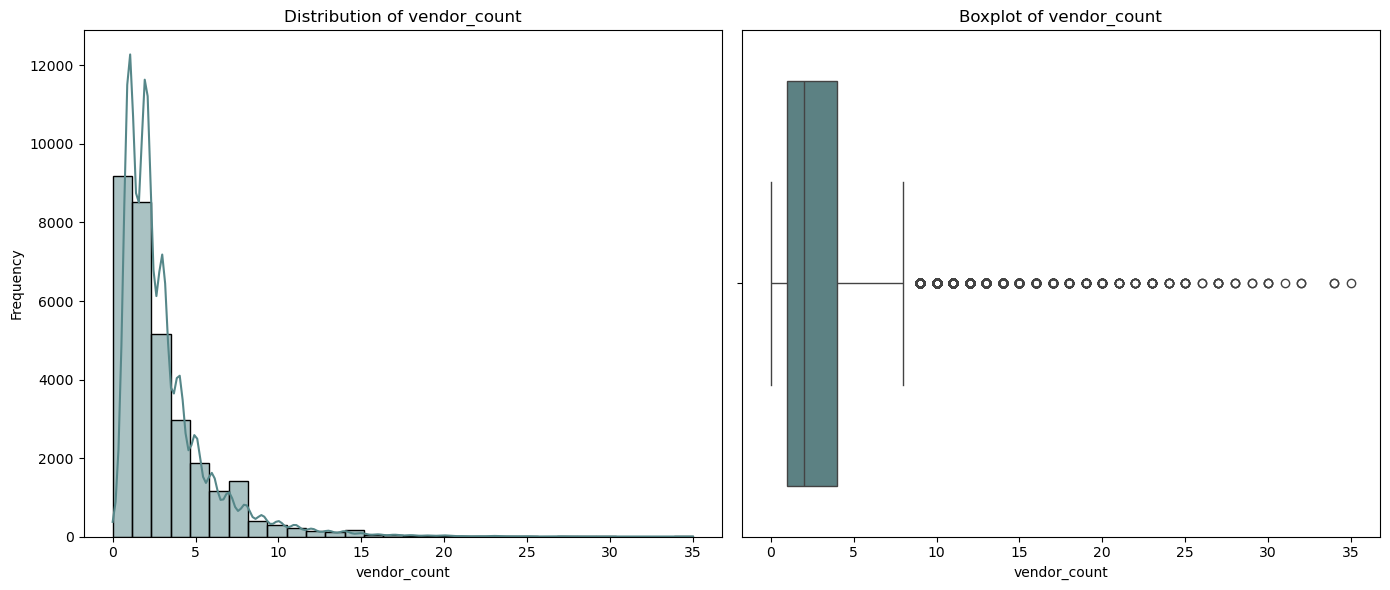

In [10]:
f.plot_distribution_and_boxplot(data_copy, 'vendor_count')

2. *`product_count`*

For this feature, we considered leaving as it is, since the most extreme value was removed previously.

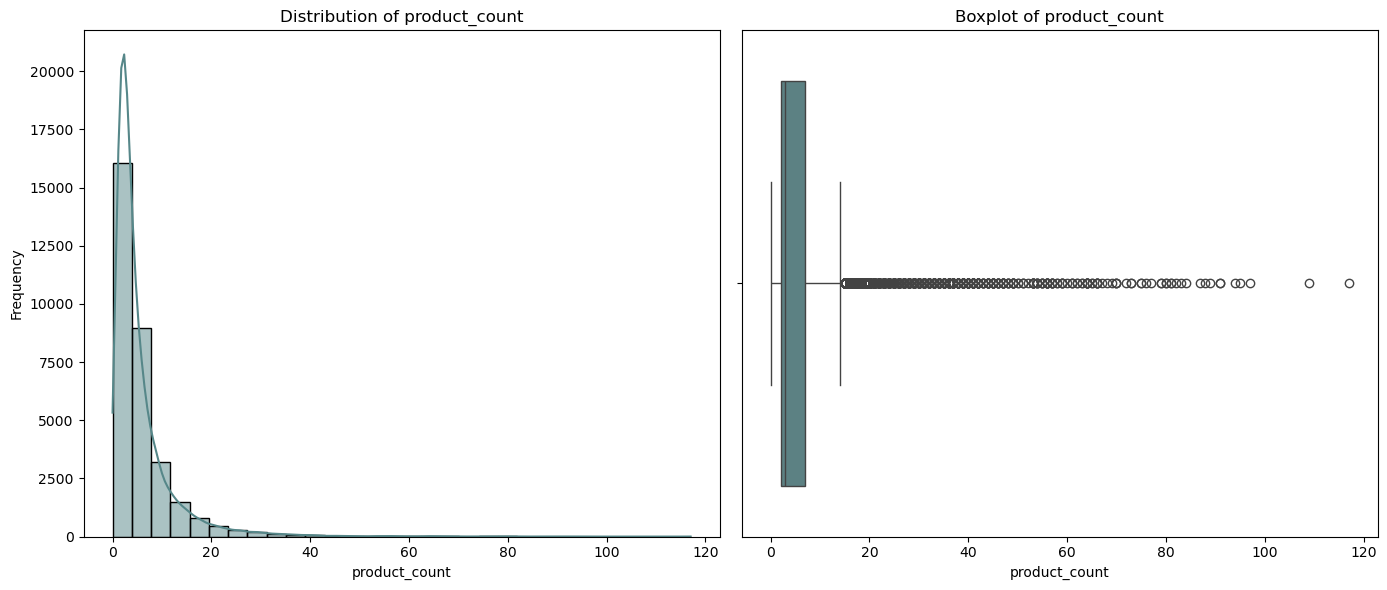

In [11]:
f.plot_distribution_and_boxplot(data_copy, 'product_count')

3. *`is_chain`*

In [12]:
data_copy = data_copy[data_copy['is_chain'].le(75)]

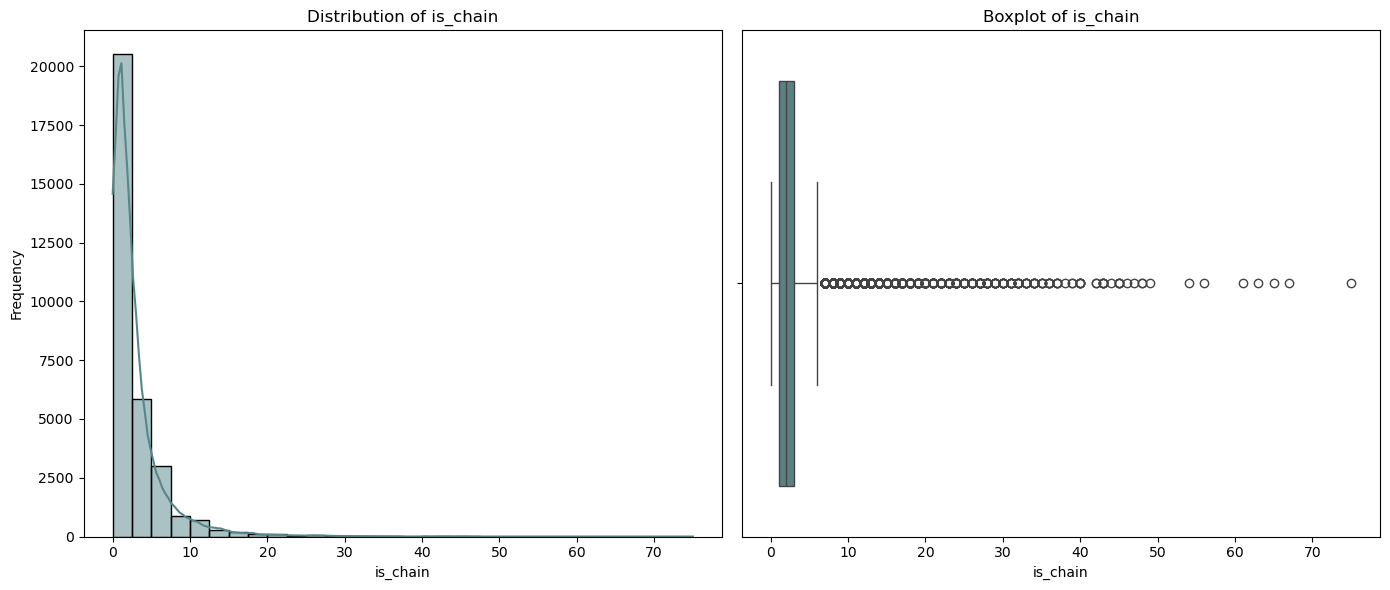

In [13]:
f.plot_distribution_and_boxplot(data_copy, 'is_chain')

4. *`CUI_American`*

In [15]:
data_copy = data_copy[data_copy['CUI_American'].lt(250)]

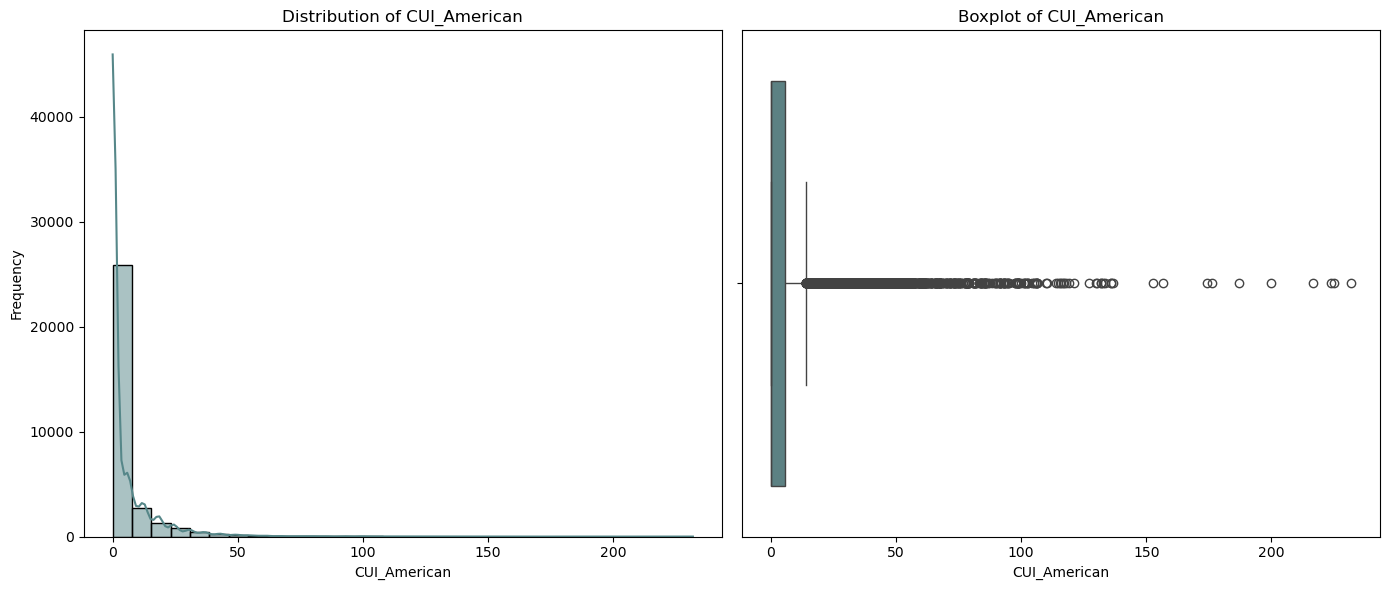

In [16]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_American')

5. *`CUI_Asian`*

In [18]:
data_copy = data_copy[data_copy['CUI_Asian'].lt(450)]

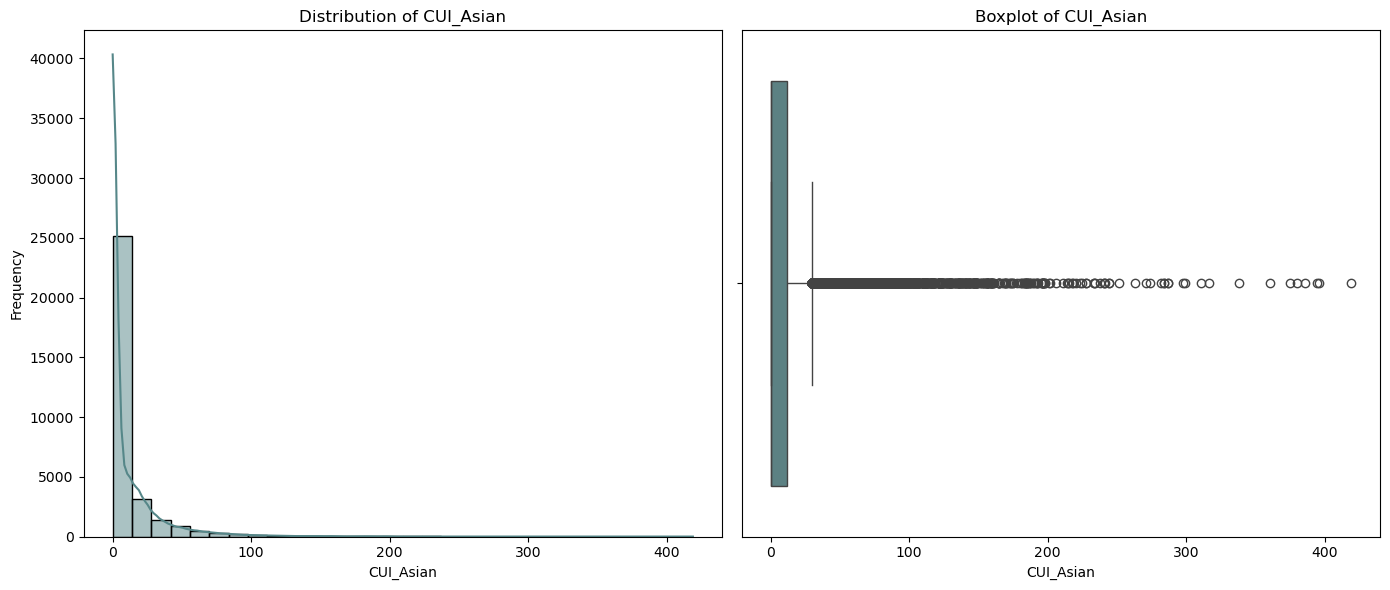

In [19]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Asian')

For the `CUI_Beverages` feature, we are going to leave it as it is since when we removed outliers in the feature `CUI_Asian` we also removed the extreme value in this feature.

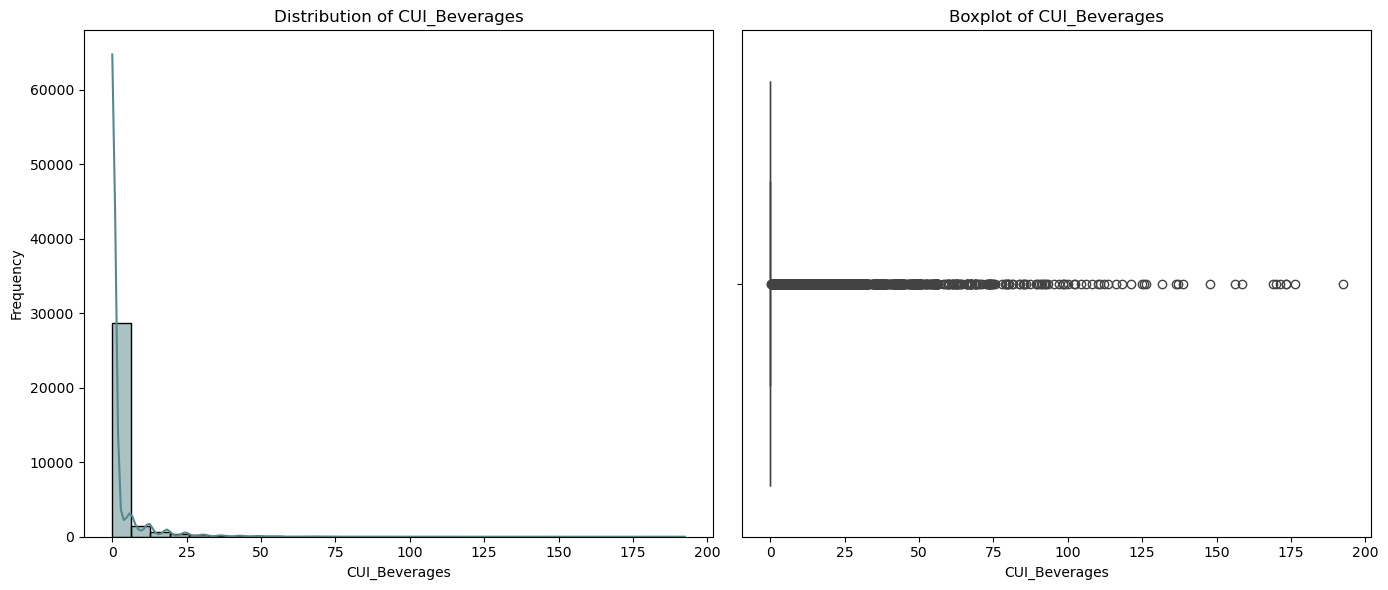

In [20]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Beverages')

6. *`CUI_Cafe`*

In [22]:
data_copy = data_copy[data_copy['CUI_Cafe'].lt(250)]

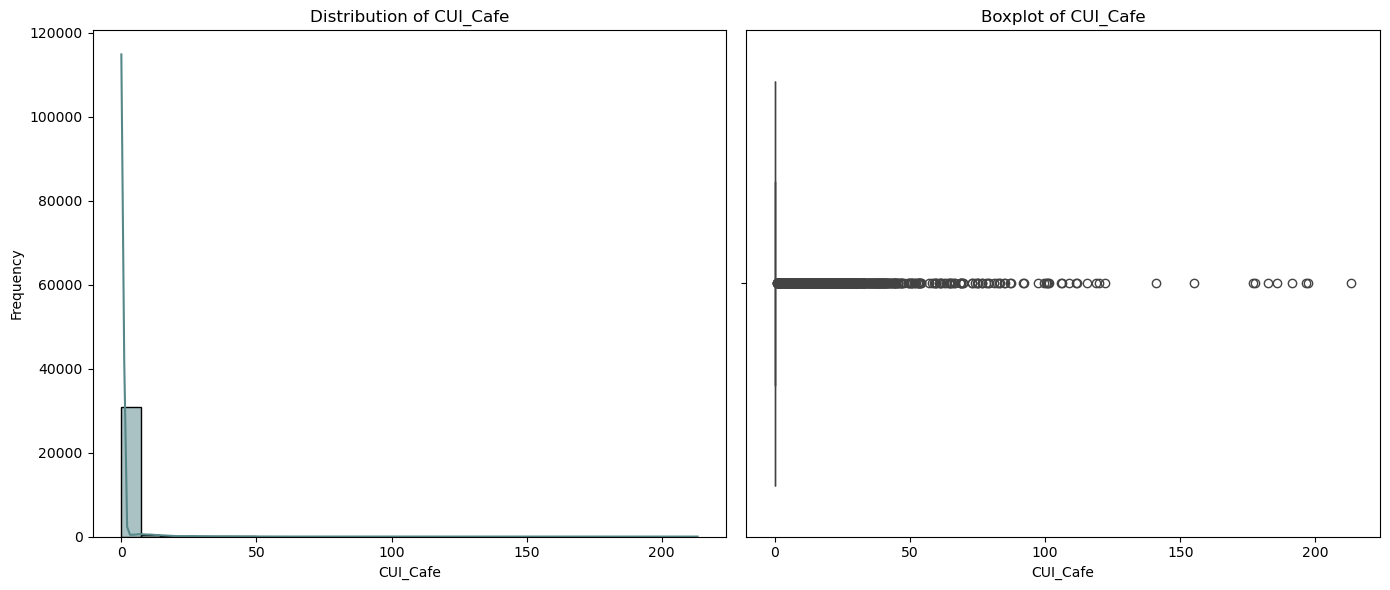

In [23]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Cafe')

7. *`CUI_Chicken Dishes`*

In [25]:
data_copy = data_copy[data_copy['CUI_Chicken Dishes'].lt(200)]

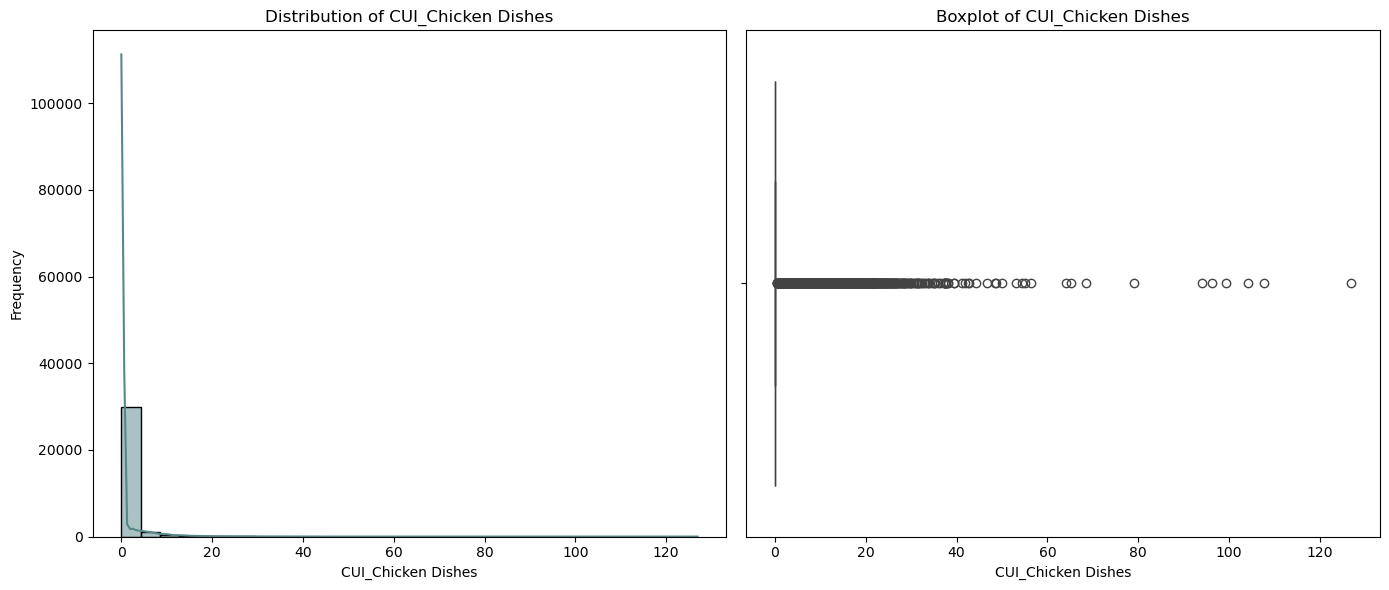

In [26]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Chicken Dishes')

8. *`CUI_Chinese`*

In [28]:
data_copy = data_copy[data_copy['CUI_Chinese'].lt(300)]

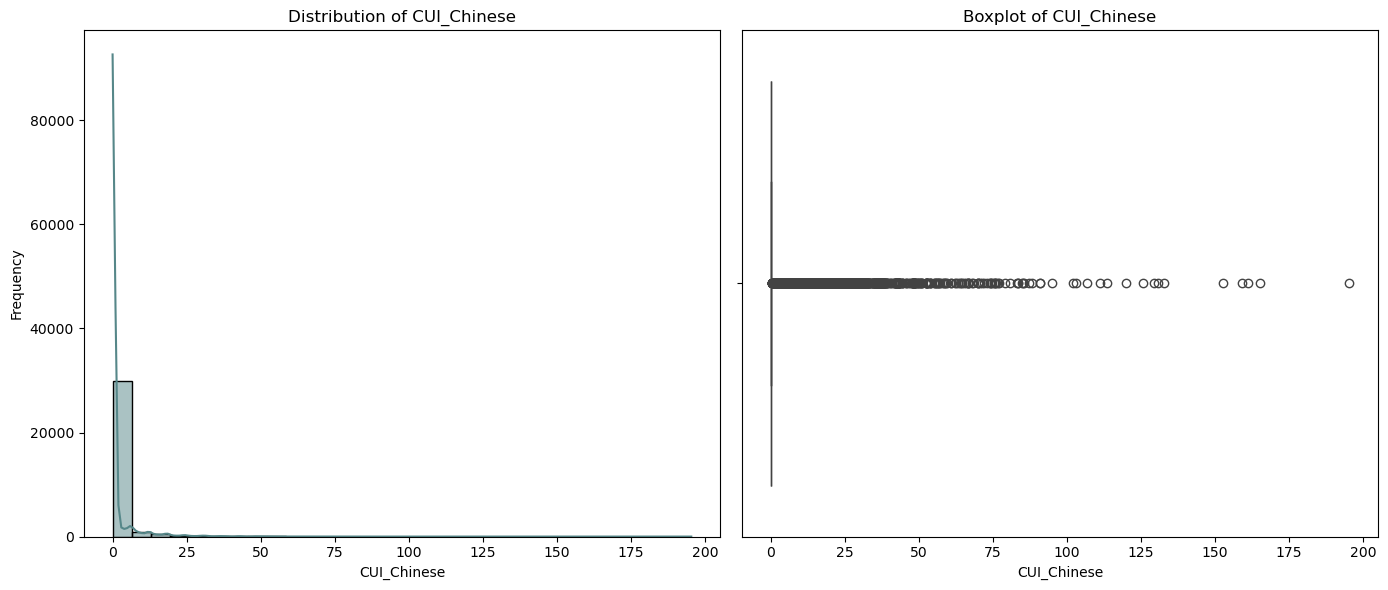

In [29]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Chinese')

9. *`CUI_Desserts`*

In [31]:
data_copy = data_copy[data_copy['CUI_Desserts'].lt(150)]

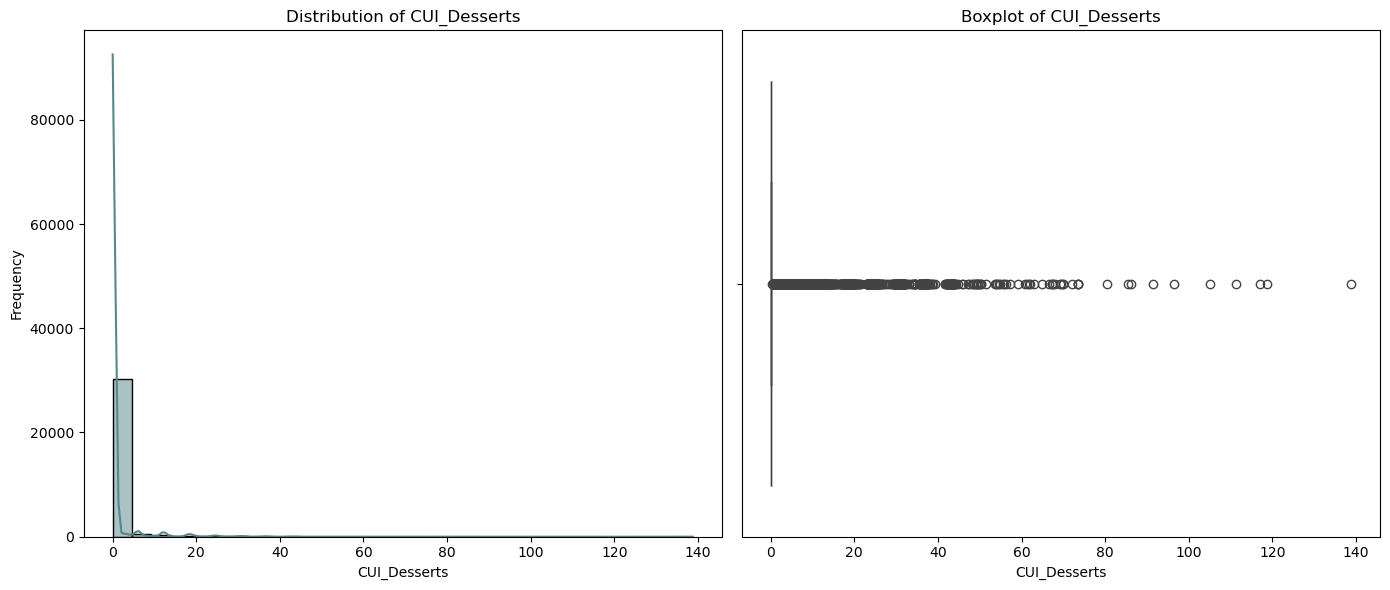

In [32]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Desserts')

10. *`CUI_Healthy`*

In [34]:
data_copy = data_copy[data_copy['CUI_Healthy'].lt(200)]

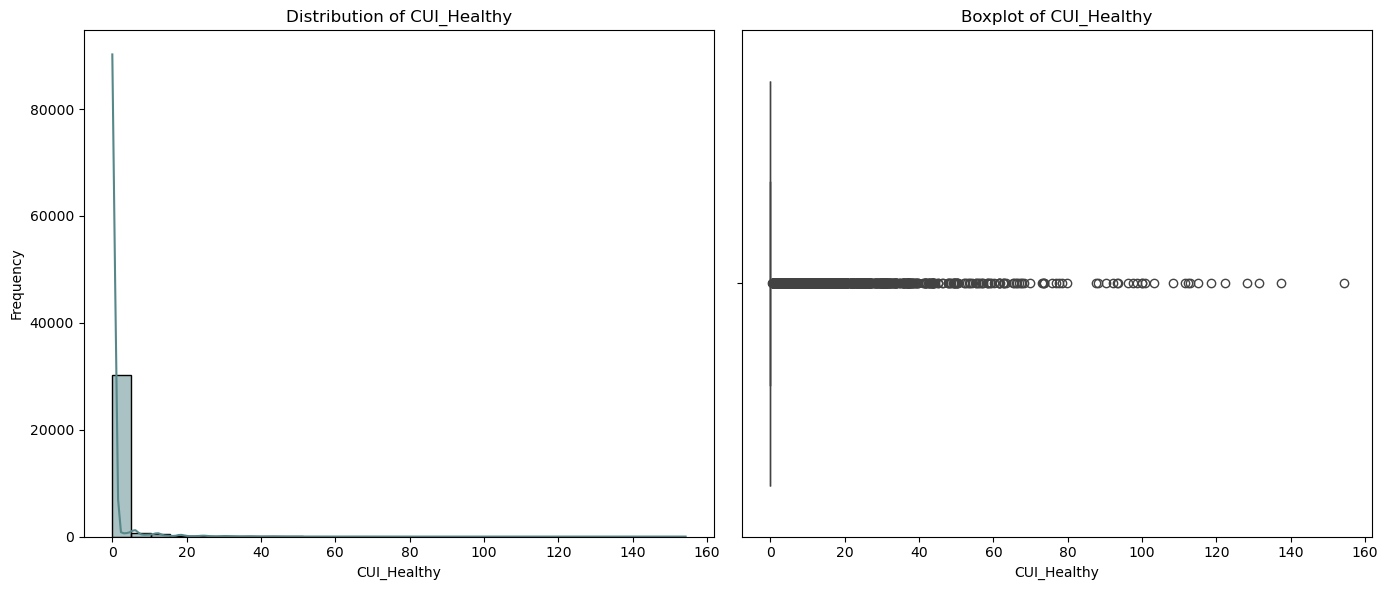

In [35]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Healthy')

11. *`CUI_Indian`*

In [37]:
data_copy = data_copy[data_copy['CUI_Indian'].lt(170)]

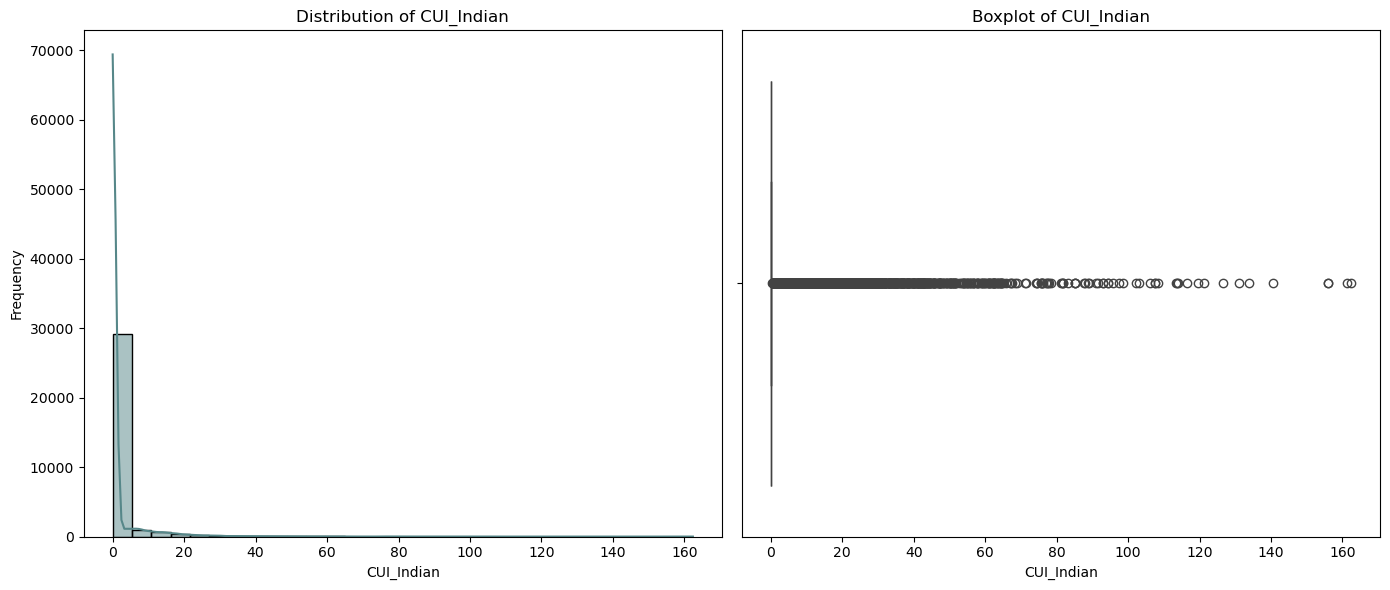

In [38]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Indian')

12. *`CUI_Italian`*

In [40]:
data_copy = data_copy[data_copy['CUI_Italian'].lt(300)]

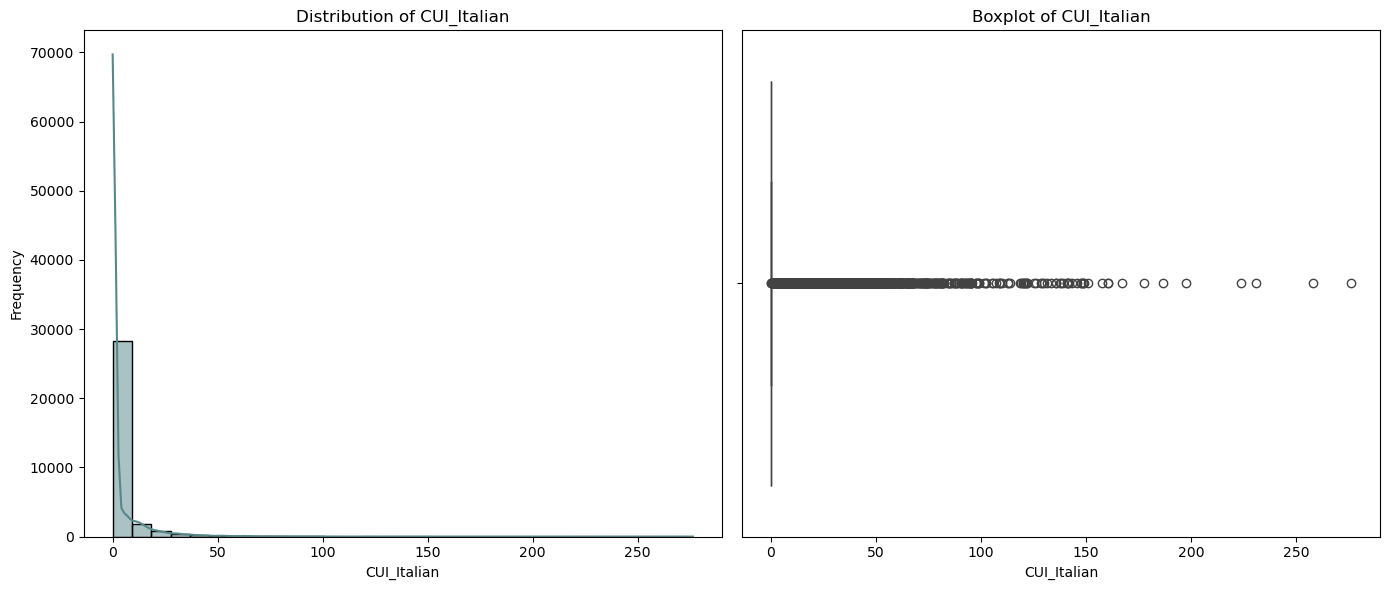

In [41]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Italian')

12. *`CUI_Japanese`*

In [43]:
data_copy = data_copy[data_copy['CUI_Japanese'].lt(300)]

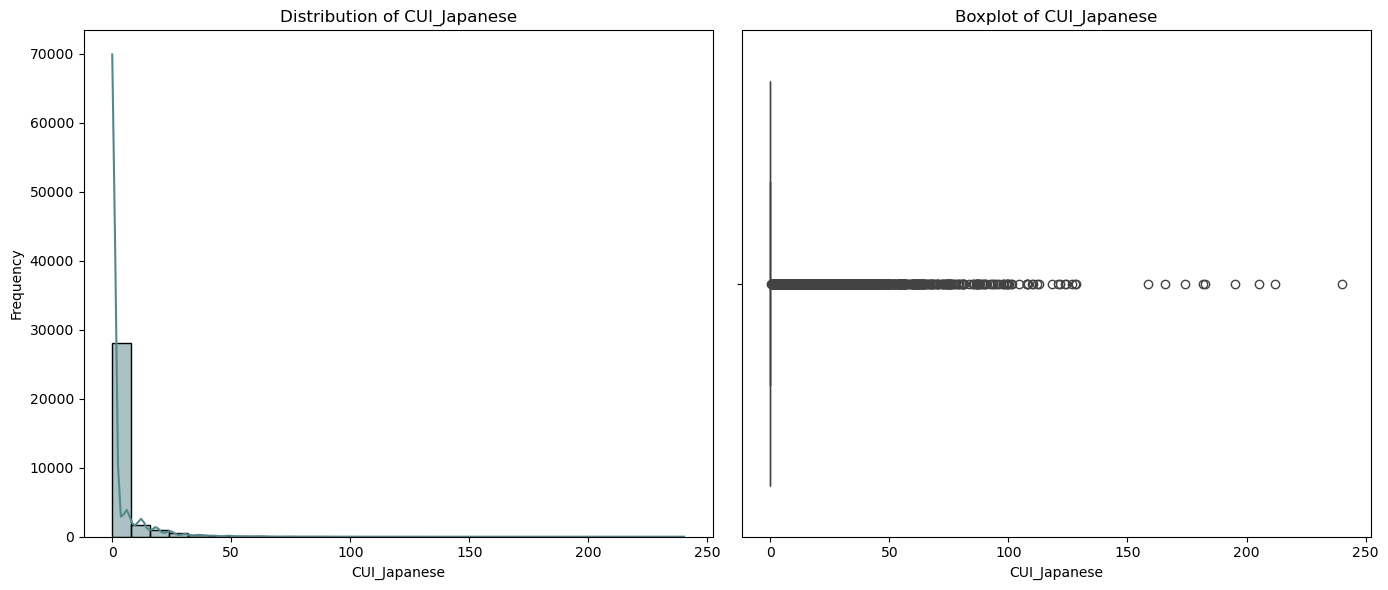

In [44]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Japanese')

13. *`CUI_Noodle Dishes`*

In [46]:
data_copy = data_copy[data_copy['CUI_Noodle Dishes'].lt(150)]

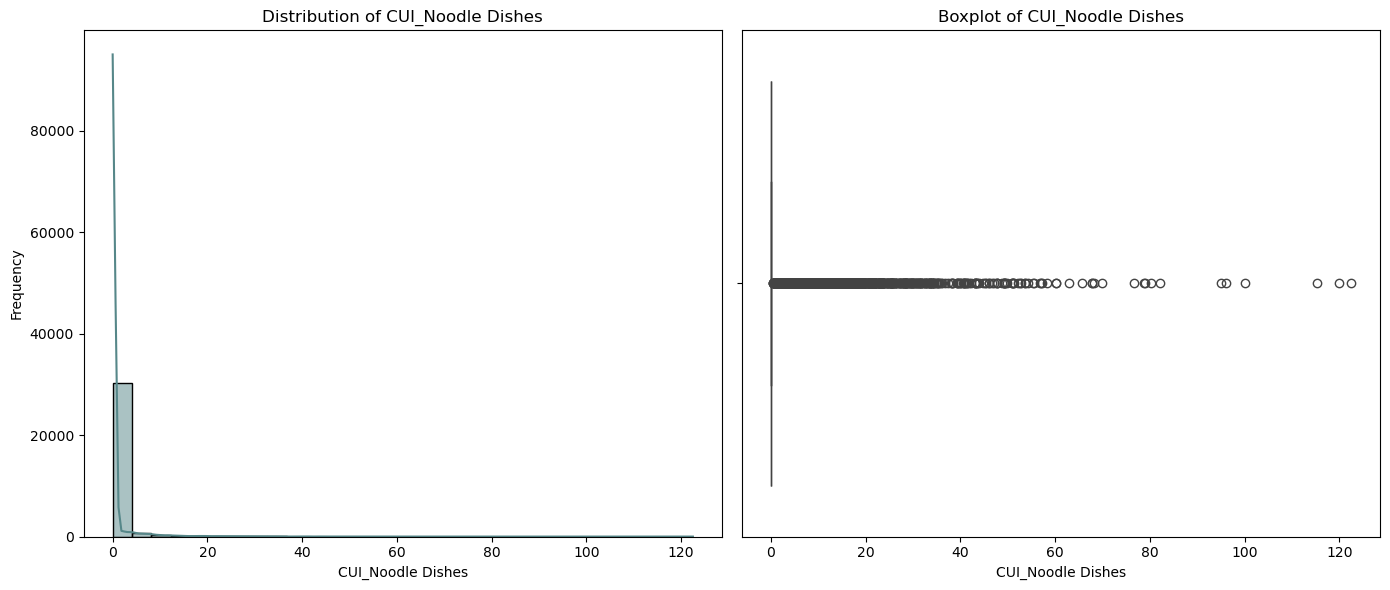

In [47]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Noodle Dishes')

14. *`CUI_OTHER`*

In [49]:
data_copy = data_copy[data_copy['CUI_OTHER'].le(250)]

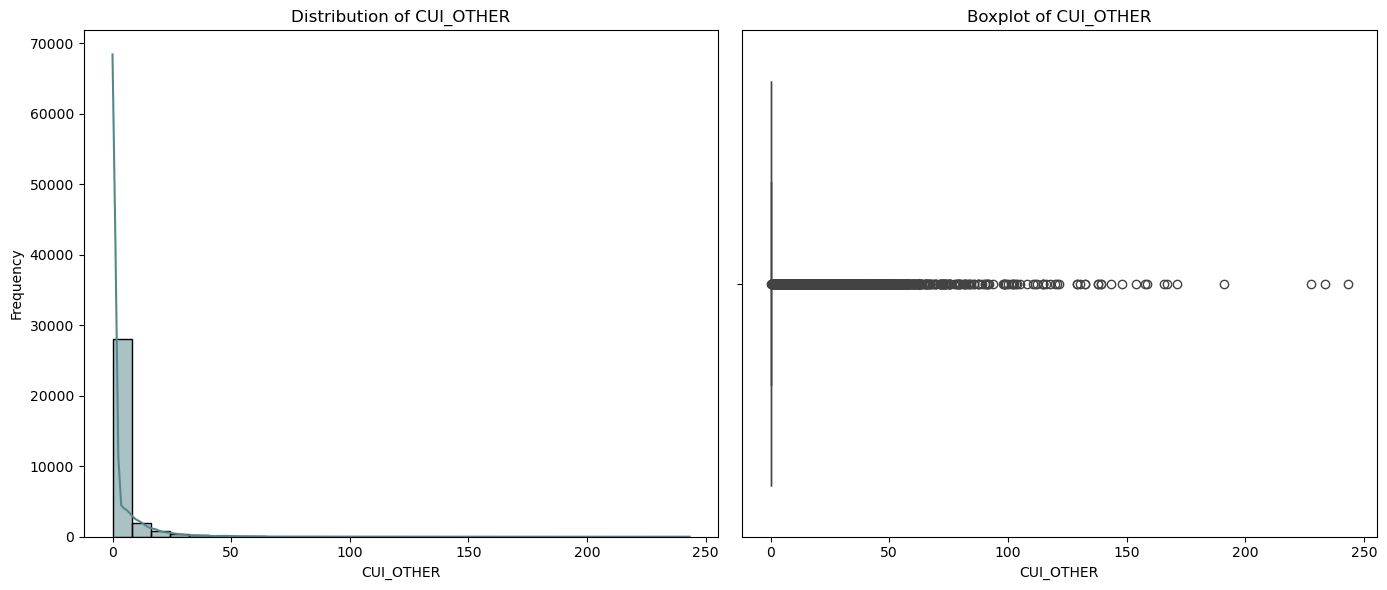

In [50]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_OTHER')

15. *`CUI_Street Food / Snacks`*

In [52]:
data_copy = data_copy[data_copy['CUI_Street Food / Snacks'].lt(350)]

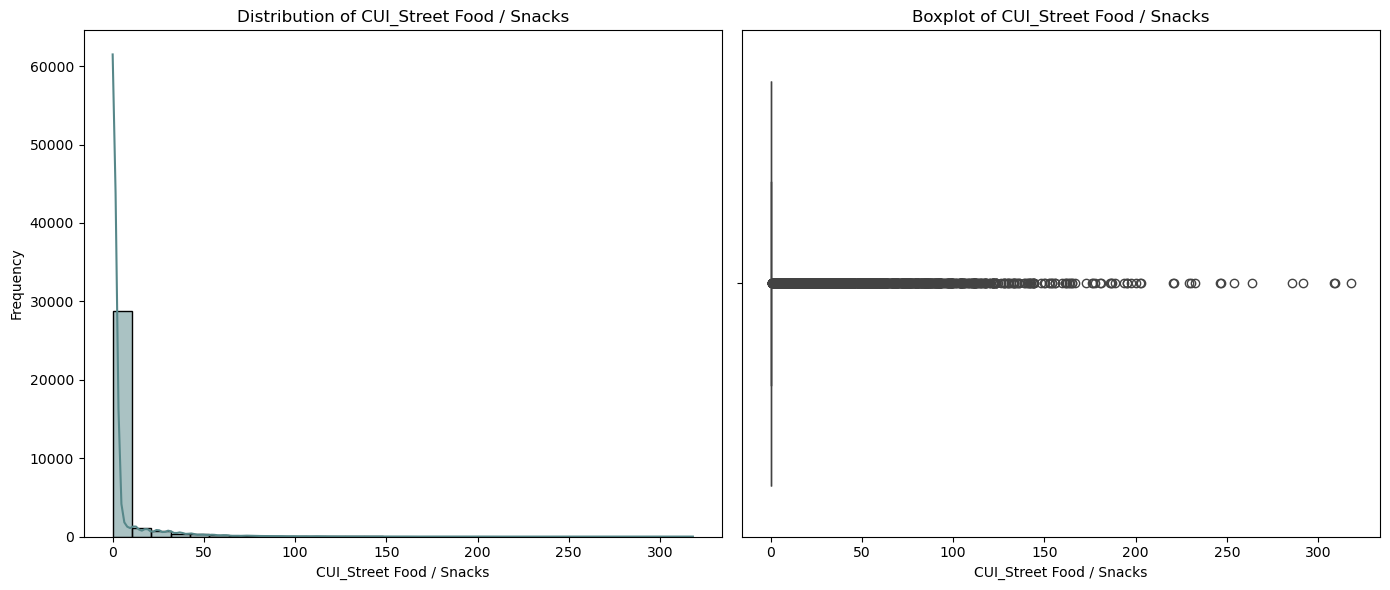

In [53]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Street Food / Snacks')

For the feature `CUI_Thai` we are going to leave it as it is, since the most extreme values were already removed when we removed others from other features.

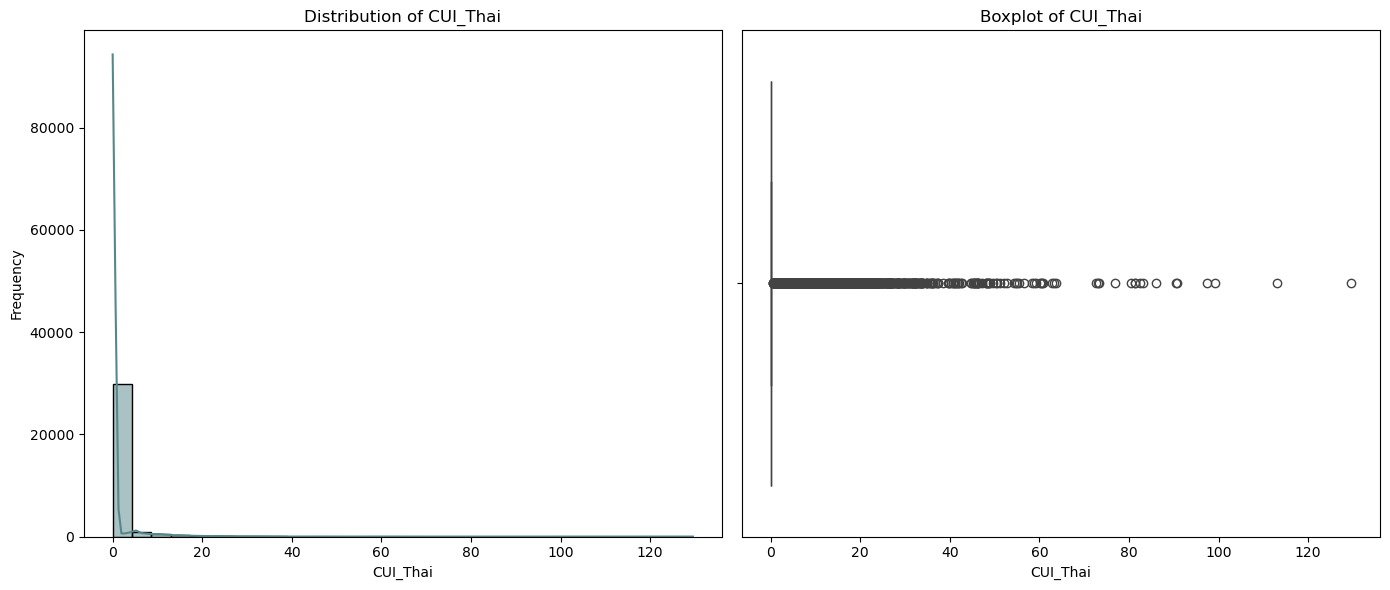

In [54]:
f.plot_distribution_and_boxplot(data_copy, 'CUI_Thai')

16. *`DOW features`*

For these variables, most of the extreme values were removed during the removal of extreme values in other features. However, some extreme values still remain, so we will remove them as well.

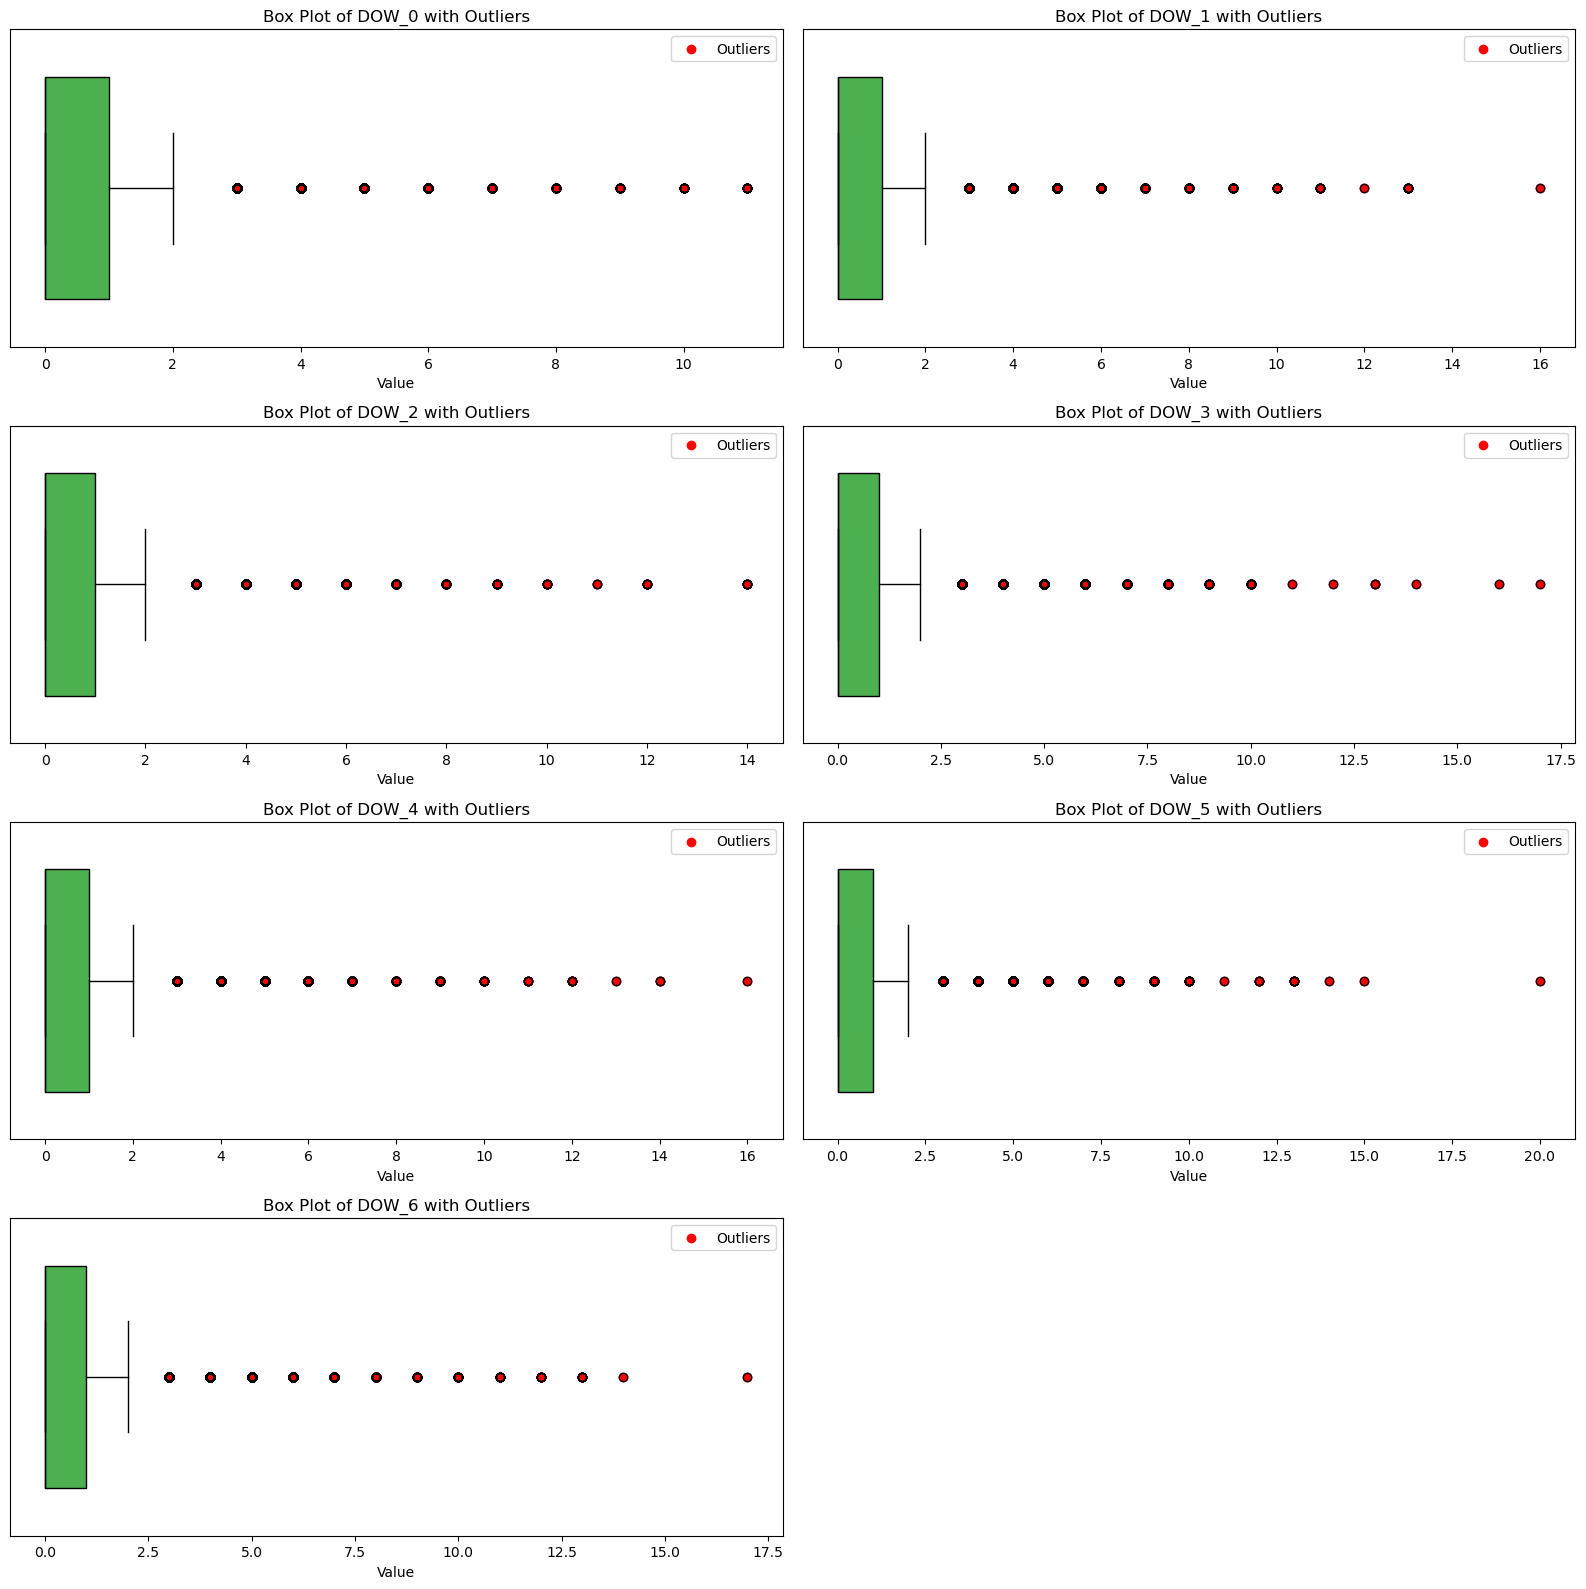

In [55]:
days = ['DOW_0', 'DOW_1', 'DOW_2','DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
f.plot_multiple_boxes_with_outliers1(data_copy, days)

In [56]:
data_copy = data_copy[data_copy['DOW_1'].le(14)]
data_copy = data_copy[data_copy['DOW_2'].le(13)]
data_copy = data_copy[data_copy['DOW_4'].le(14)]
data_copy = data_copy[data_copy['DOW_5'].le(16)]
data_copy = data_copy[data_copy['DOW_6'].le(15)]

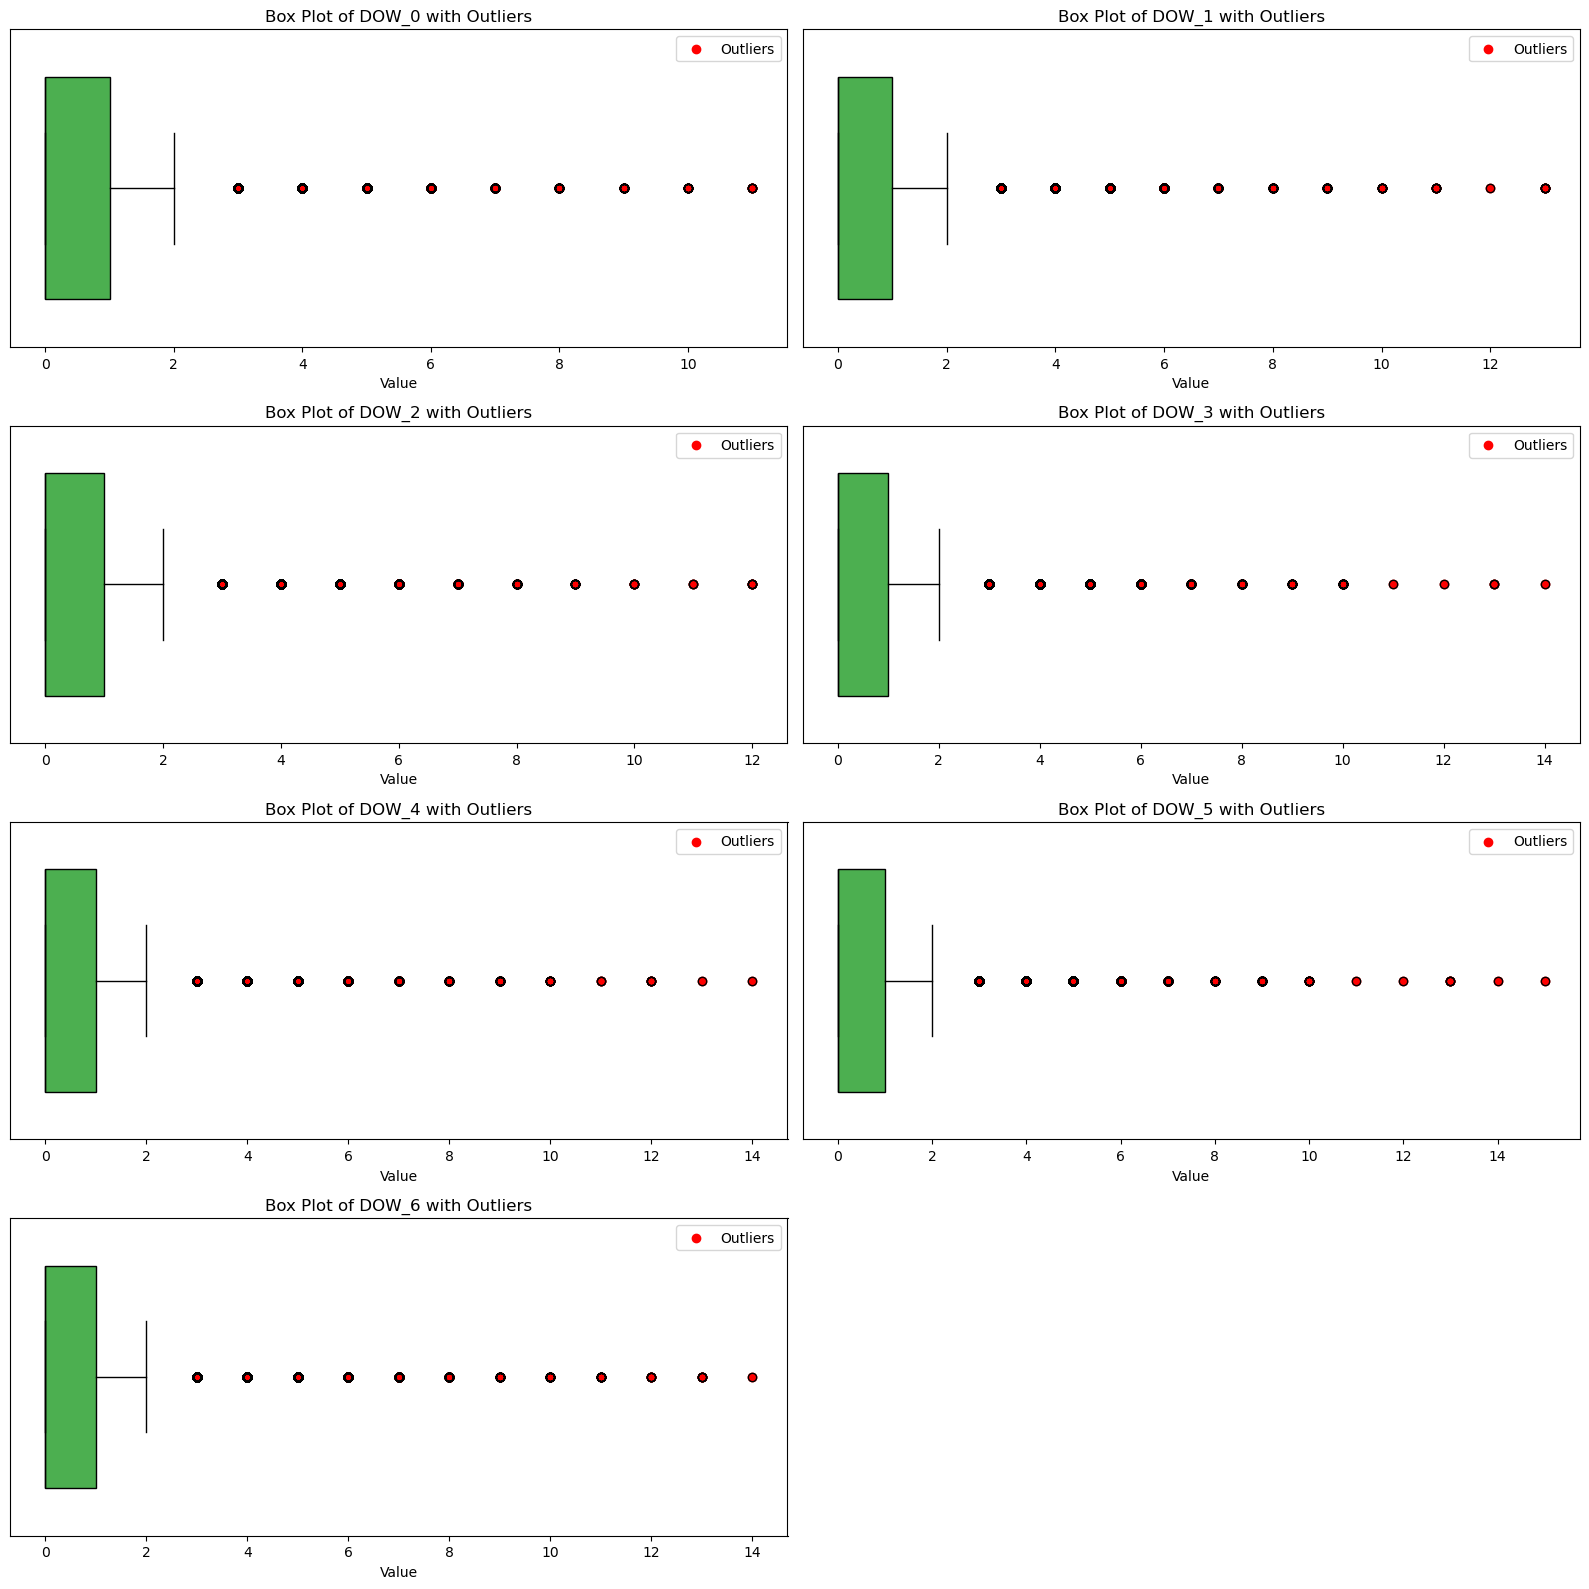

In [57]:
f.plot_multiple_boxes_with_outliers1(data_copy, days)

16. *`Hours of the day features`*

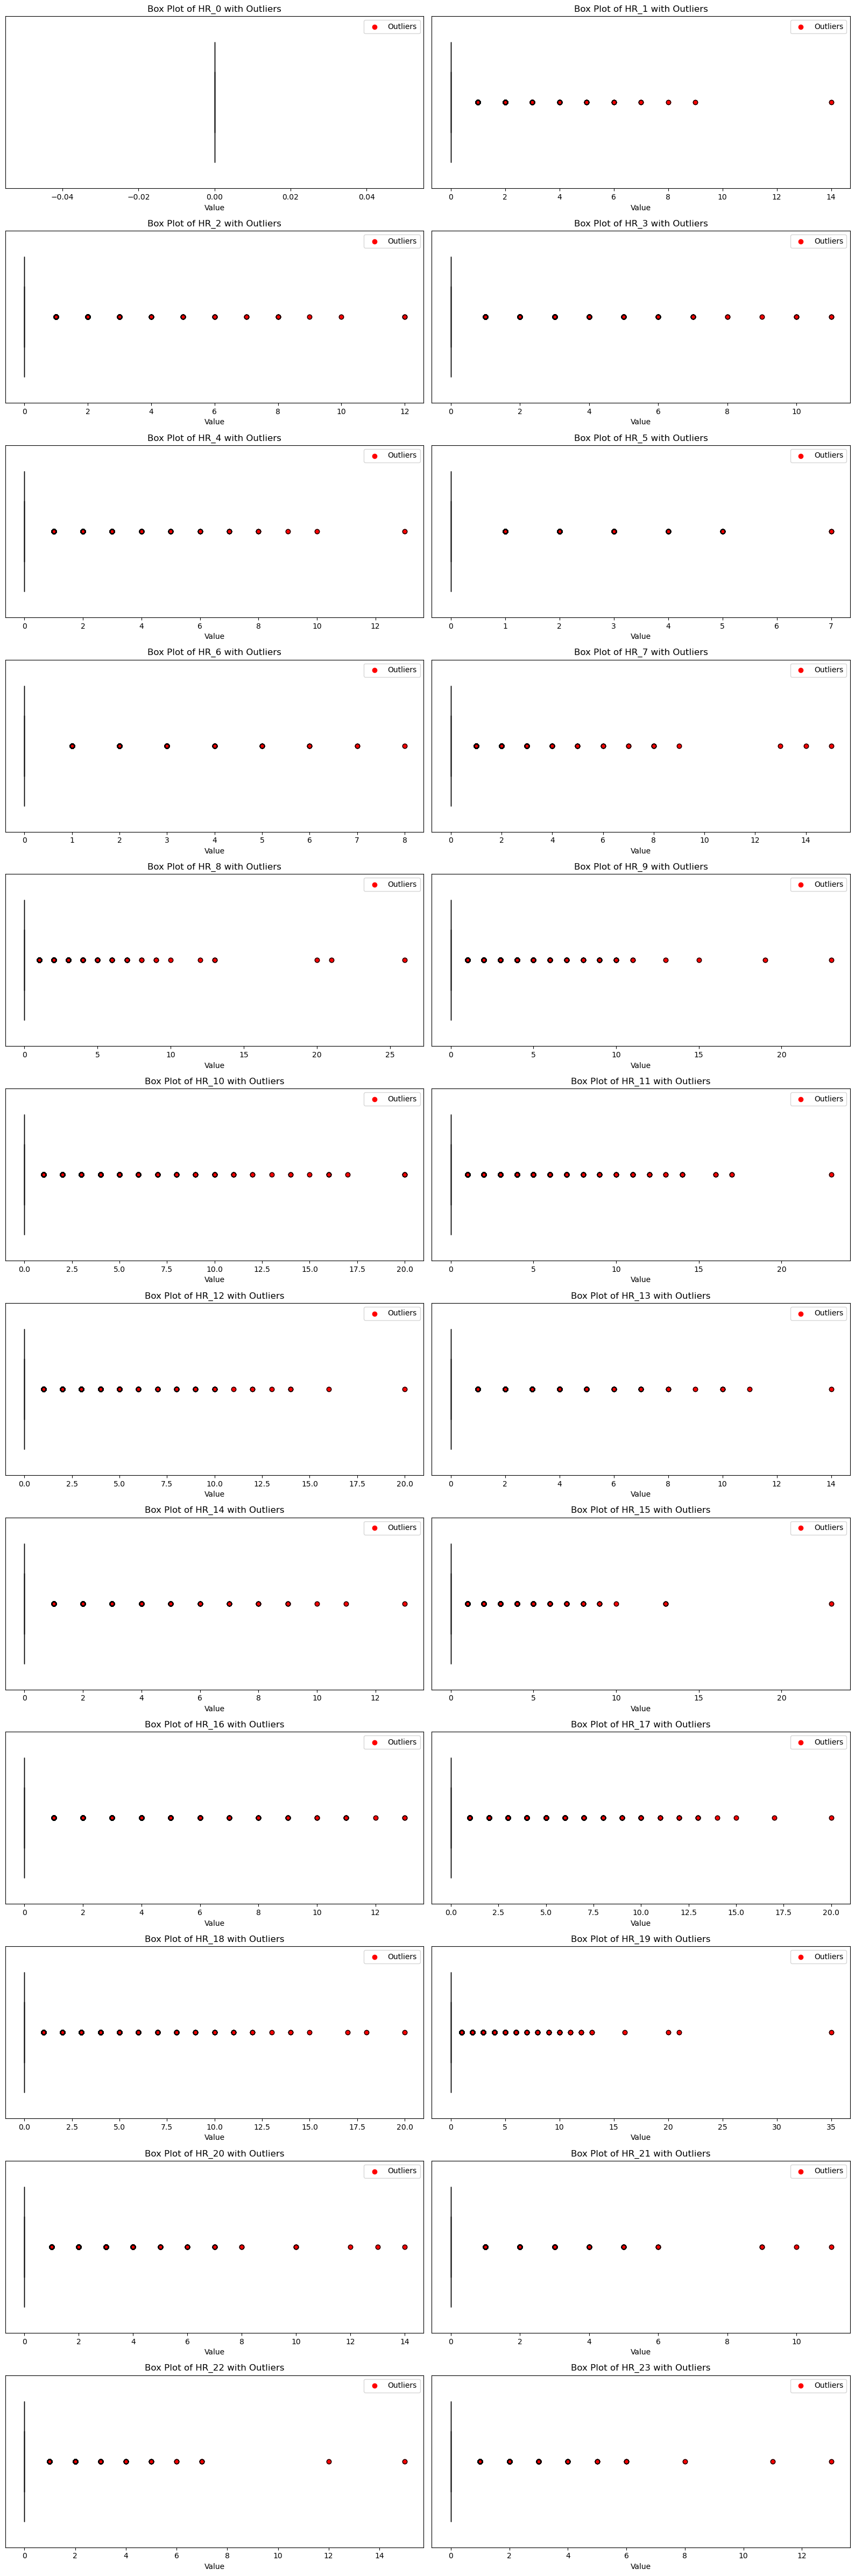

In [60]:
hours = ['HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

f.plot_multiple_boxes_with_outliers1(data_copy, hours)

In [61]:
data_copy = data_copy[data_copy['HR_1'].le(10)]
data_copy = data_copy[data_copy['HR_4'].le(10)]
data_copy = data_copy[data_copy['HR_5'].le(5)]
data_copy = data_copy[data_copy['HR_7'].le(10)]
data_copy = data_copy[data_copy['HR_9'].le(15)]
data_copy = data_copy[data_copy['HR_11'].le(20)]
data_copy = data_copy[data_copy['HR_15'].le(20)]
data_copy = data_copy[data_copy['HR_19'].le(25)]
data_copy = data_copy[data_copy['HR_22'].le(10)]

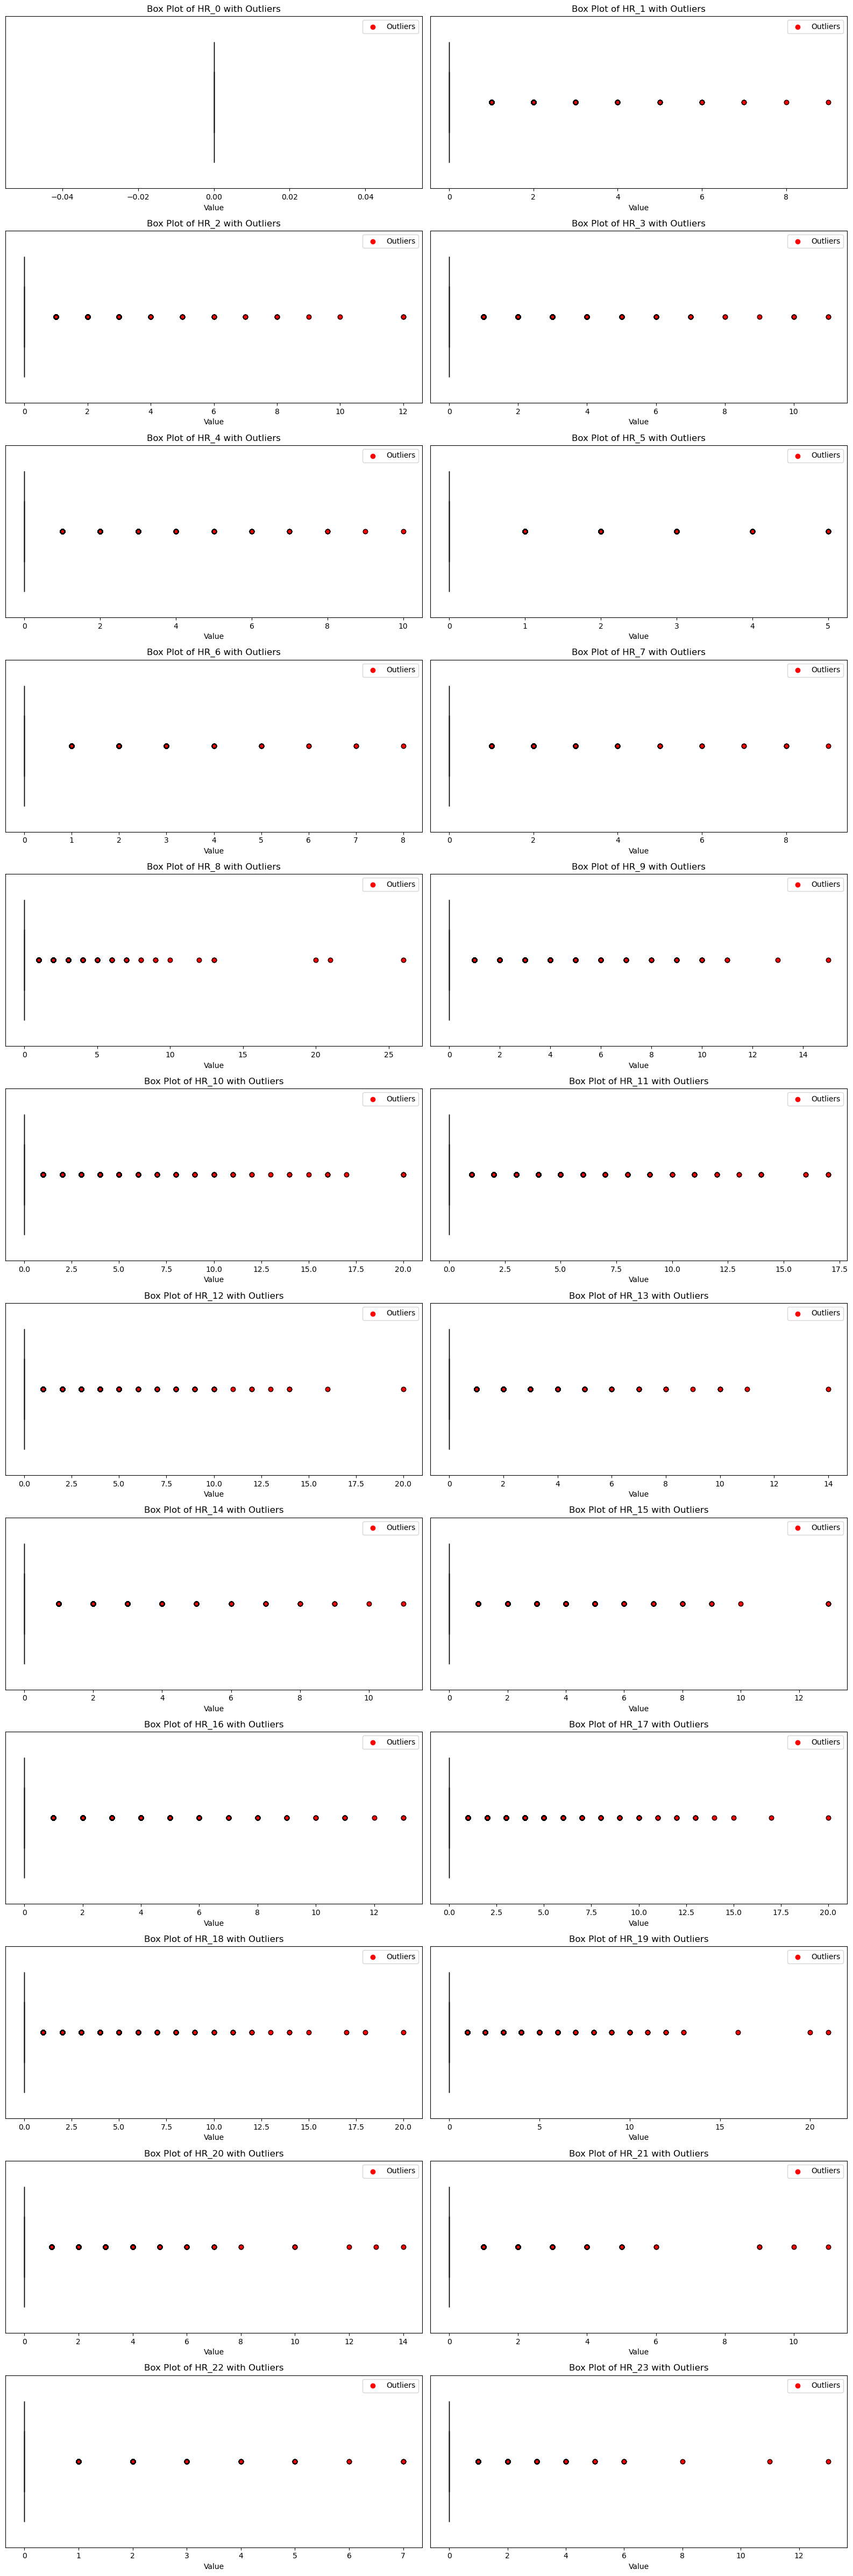

In [62]:
f.plot_multiple_boxes_with_outliers1(data_copy, hours)

Creating a new dataframe to store the outliers

In [72]:
outlier_data = data[~data.isin(data_copy.to_dict(orient='list')).all(axis=1)]

# VER ESTAS

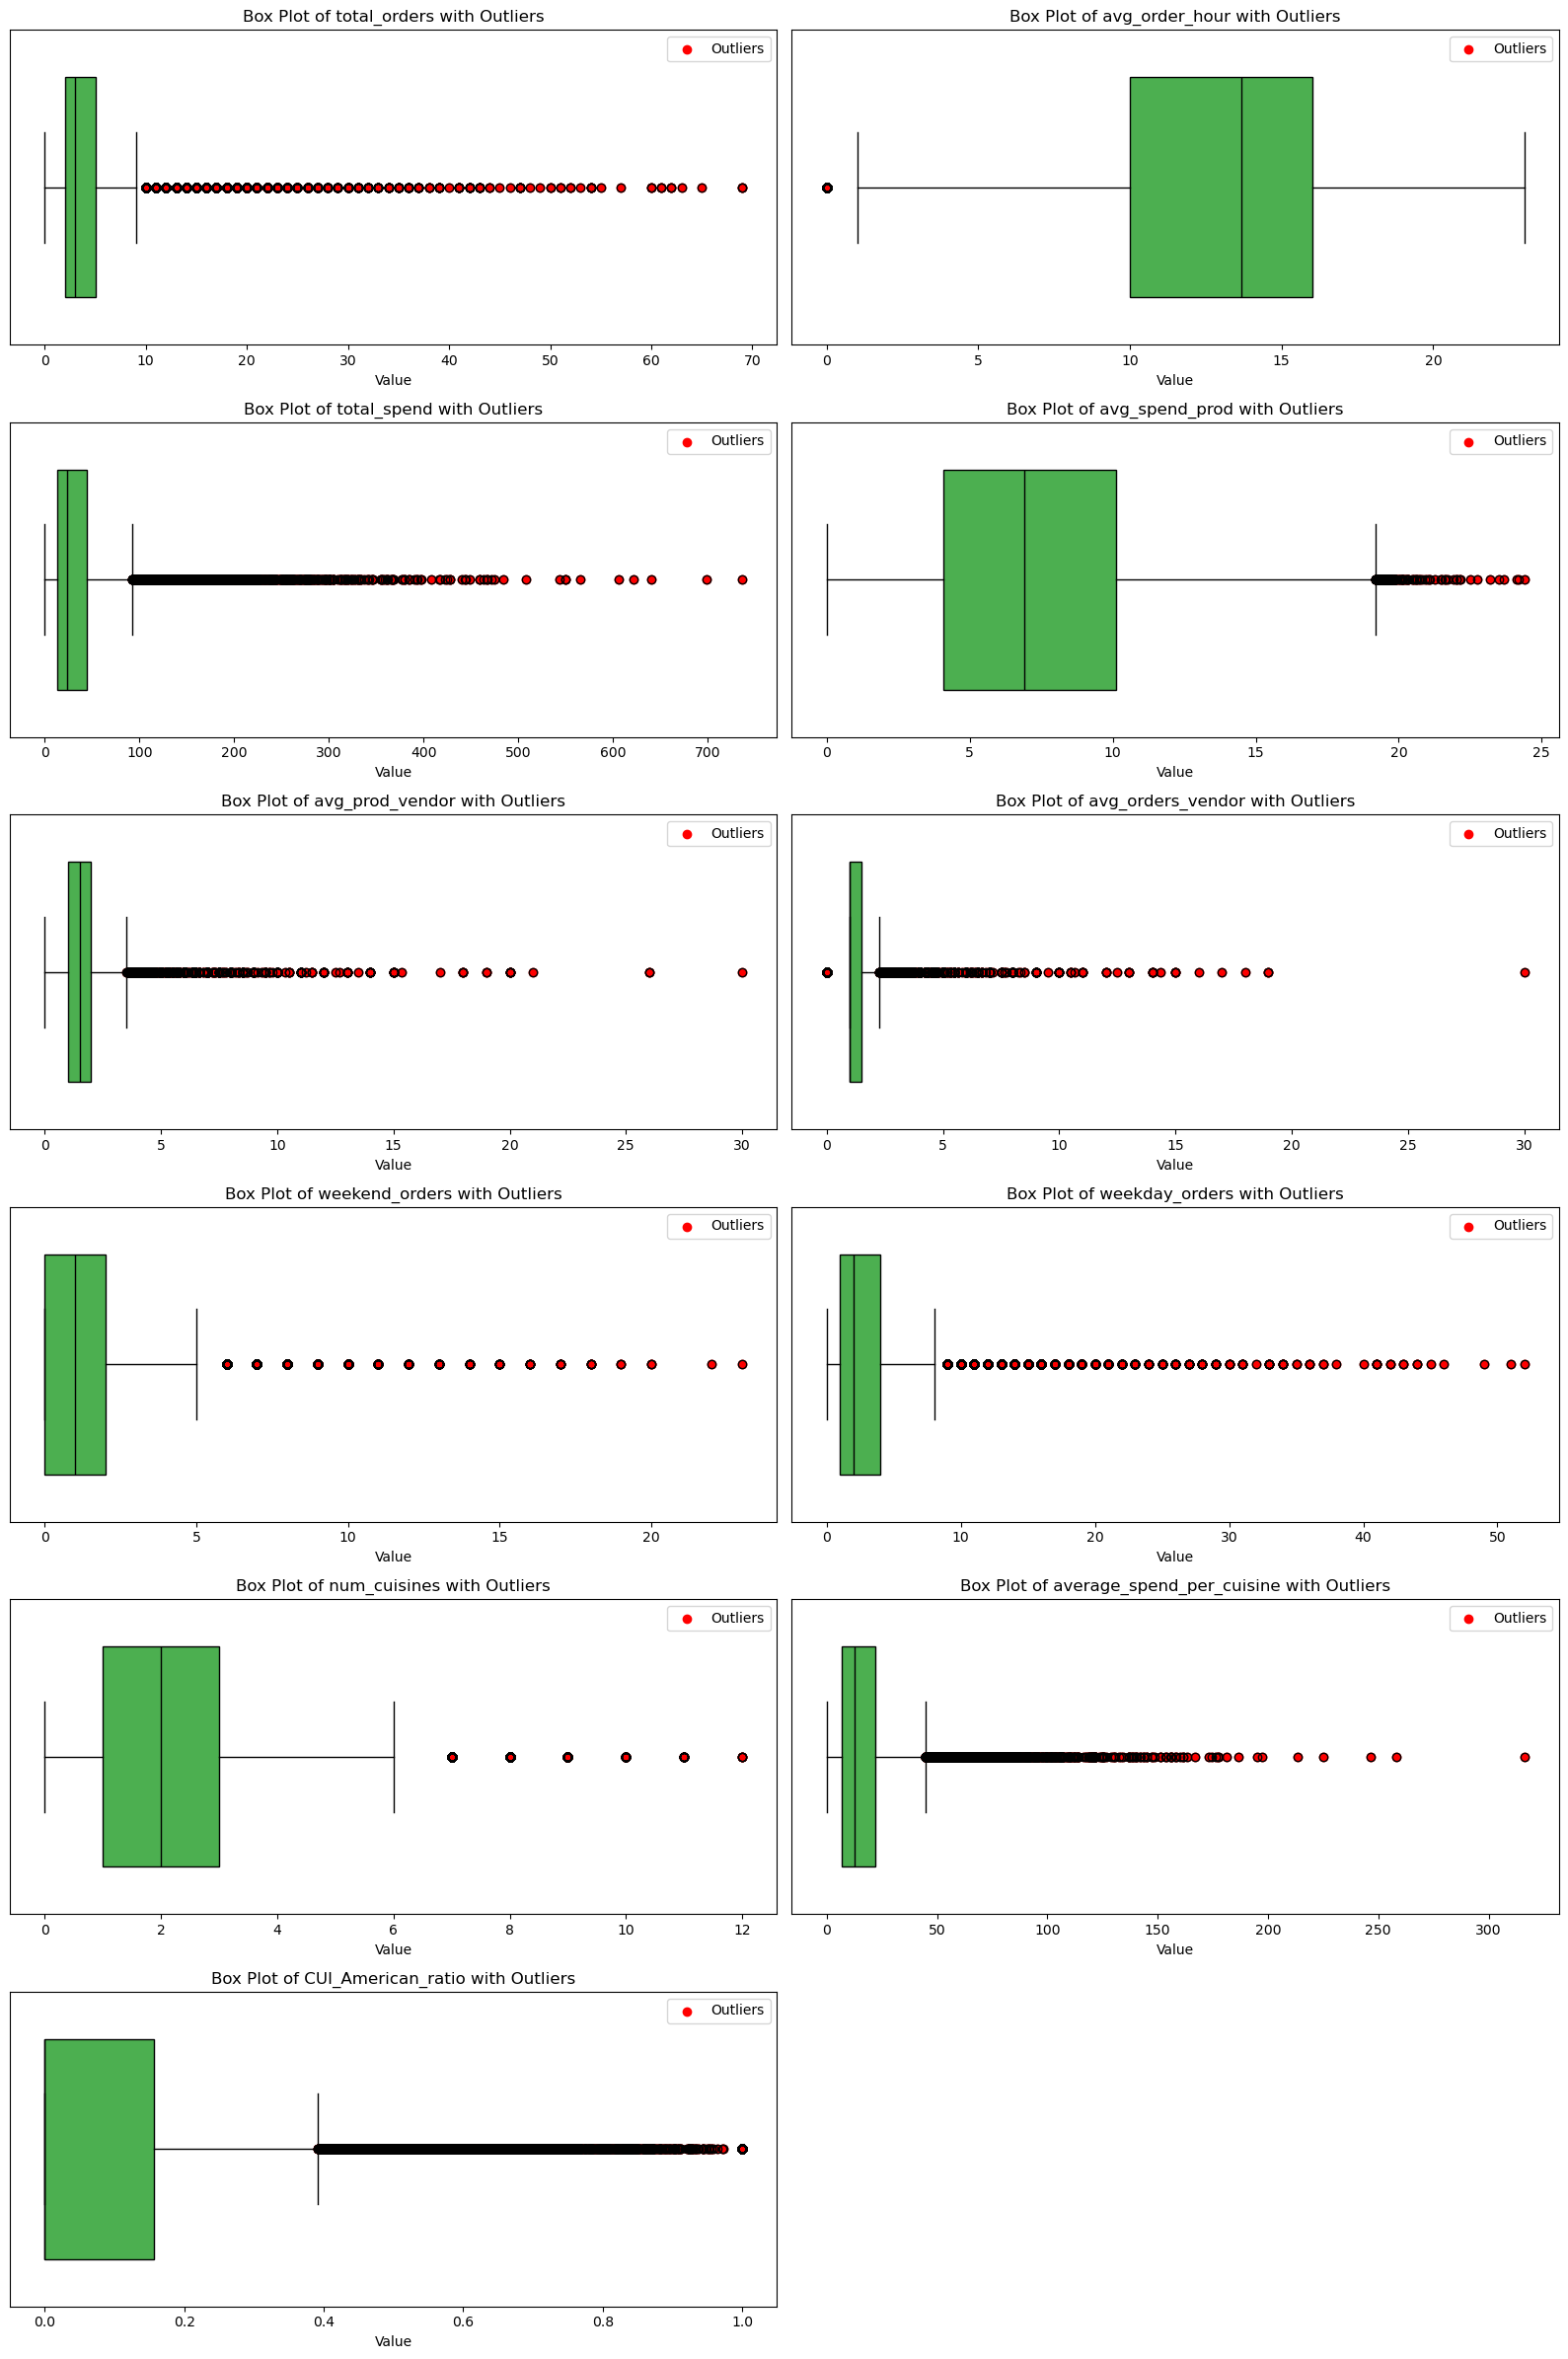

In [ ]:
columns = ['total_orders', 'avg_order_hour','total_spend', 'avg_spend_prod', 'avg_prod_vendor', 'avg_orders_vendor',
           'weekend_orders', 'weekday_orders', 'num_cuisines', 'average_spend_per_cuisine']
f.plot_multiple_boxes_with_outliers1(data_copy, columns)

<br>

# 3. Feature Selection

In [24]:
data.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'promo_DELIVERY',
       'promo_DISCOUNT', 'promo_FREEBIE', 'promo_NO DISCOUNT', 'pay_CARD',
       'pay_CASH', 'pay_DIGI', 'last_promo_enc', 'payment_method_enc',
       'days_between', 'total_orders', 'avg_order_hour', 'total_spend',
       'avg_spend_prod', 'is_repeat_cus

In [25]:
promo_columns = ['promo_DELIVERY', 'promo_DISCOUNT', 'promo_FREEBIE']
enc_columns = [col_name for col_name in data.columns if 'enc' in col_name] + ['is_repeat_customer']

In [26]:
data_num = data.select_dtypes(include=np.number).set_index(data.index)
data_num.drop(promo_columns + enc_columns, axis = 1, inplace = True)

data_cat = data.select_dtypes(exclude=np.number).set_index(data.index)
data_cat[promo_columns + enc_columns] = data[promo_columns + enc_columns]

<br>

## 3.1. Univariate variables

Here, we are going to check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.

In [27]:
data_num.var().sort_values()

HR_0               0.007329
HR_23              0.079616
HR_22              0.088823
HR_1               0.100108
HR_6               0.108596
                   ...     
last_order       539.710501
CUI_Asian        555.608208
first_order      581.628760
days_between     866.590118
total_spend     2153.547644
Length: 67, dtype: float64

None of our variables have a variance of zero, so we do not drop any of them.

<br>

## 3.2 Spearman Correlation

After, we decided to check once more the correlation between our features to conclude which variables are redundant and can be excluded.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


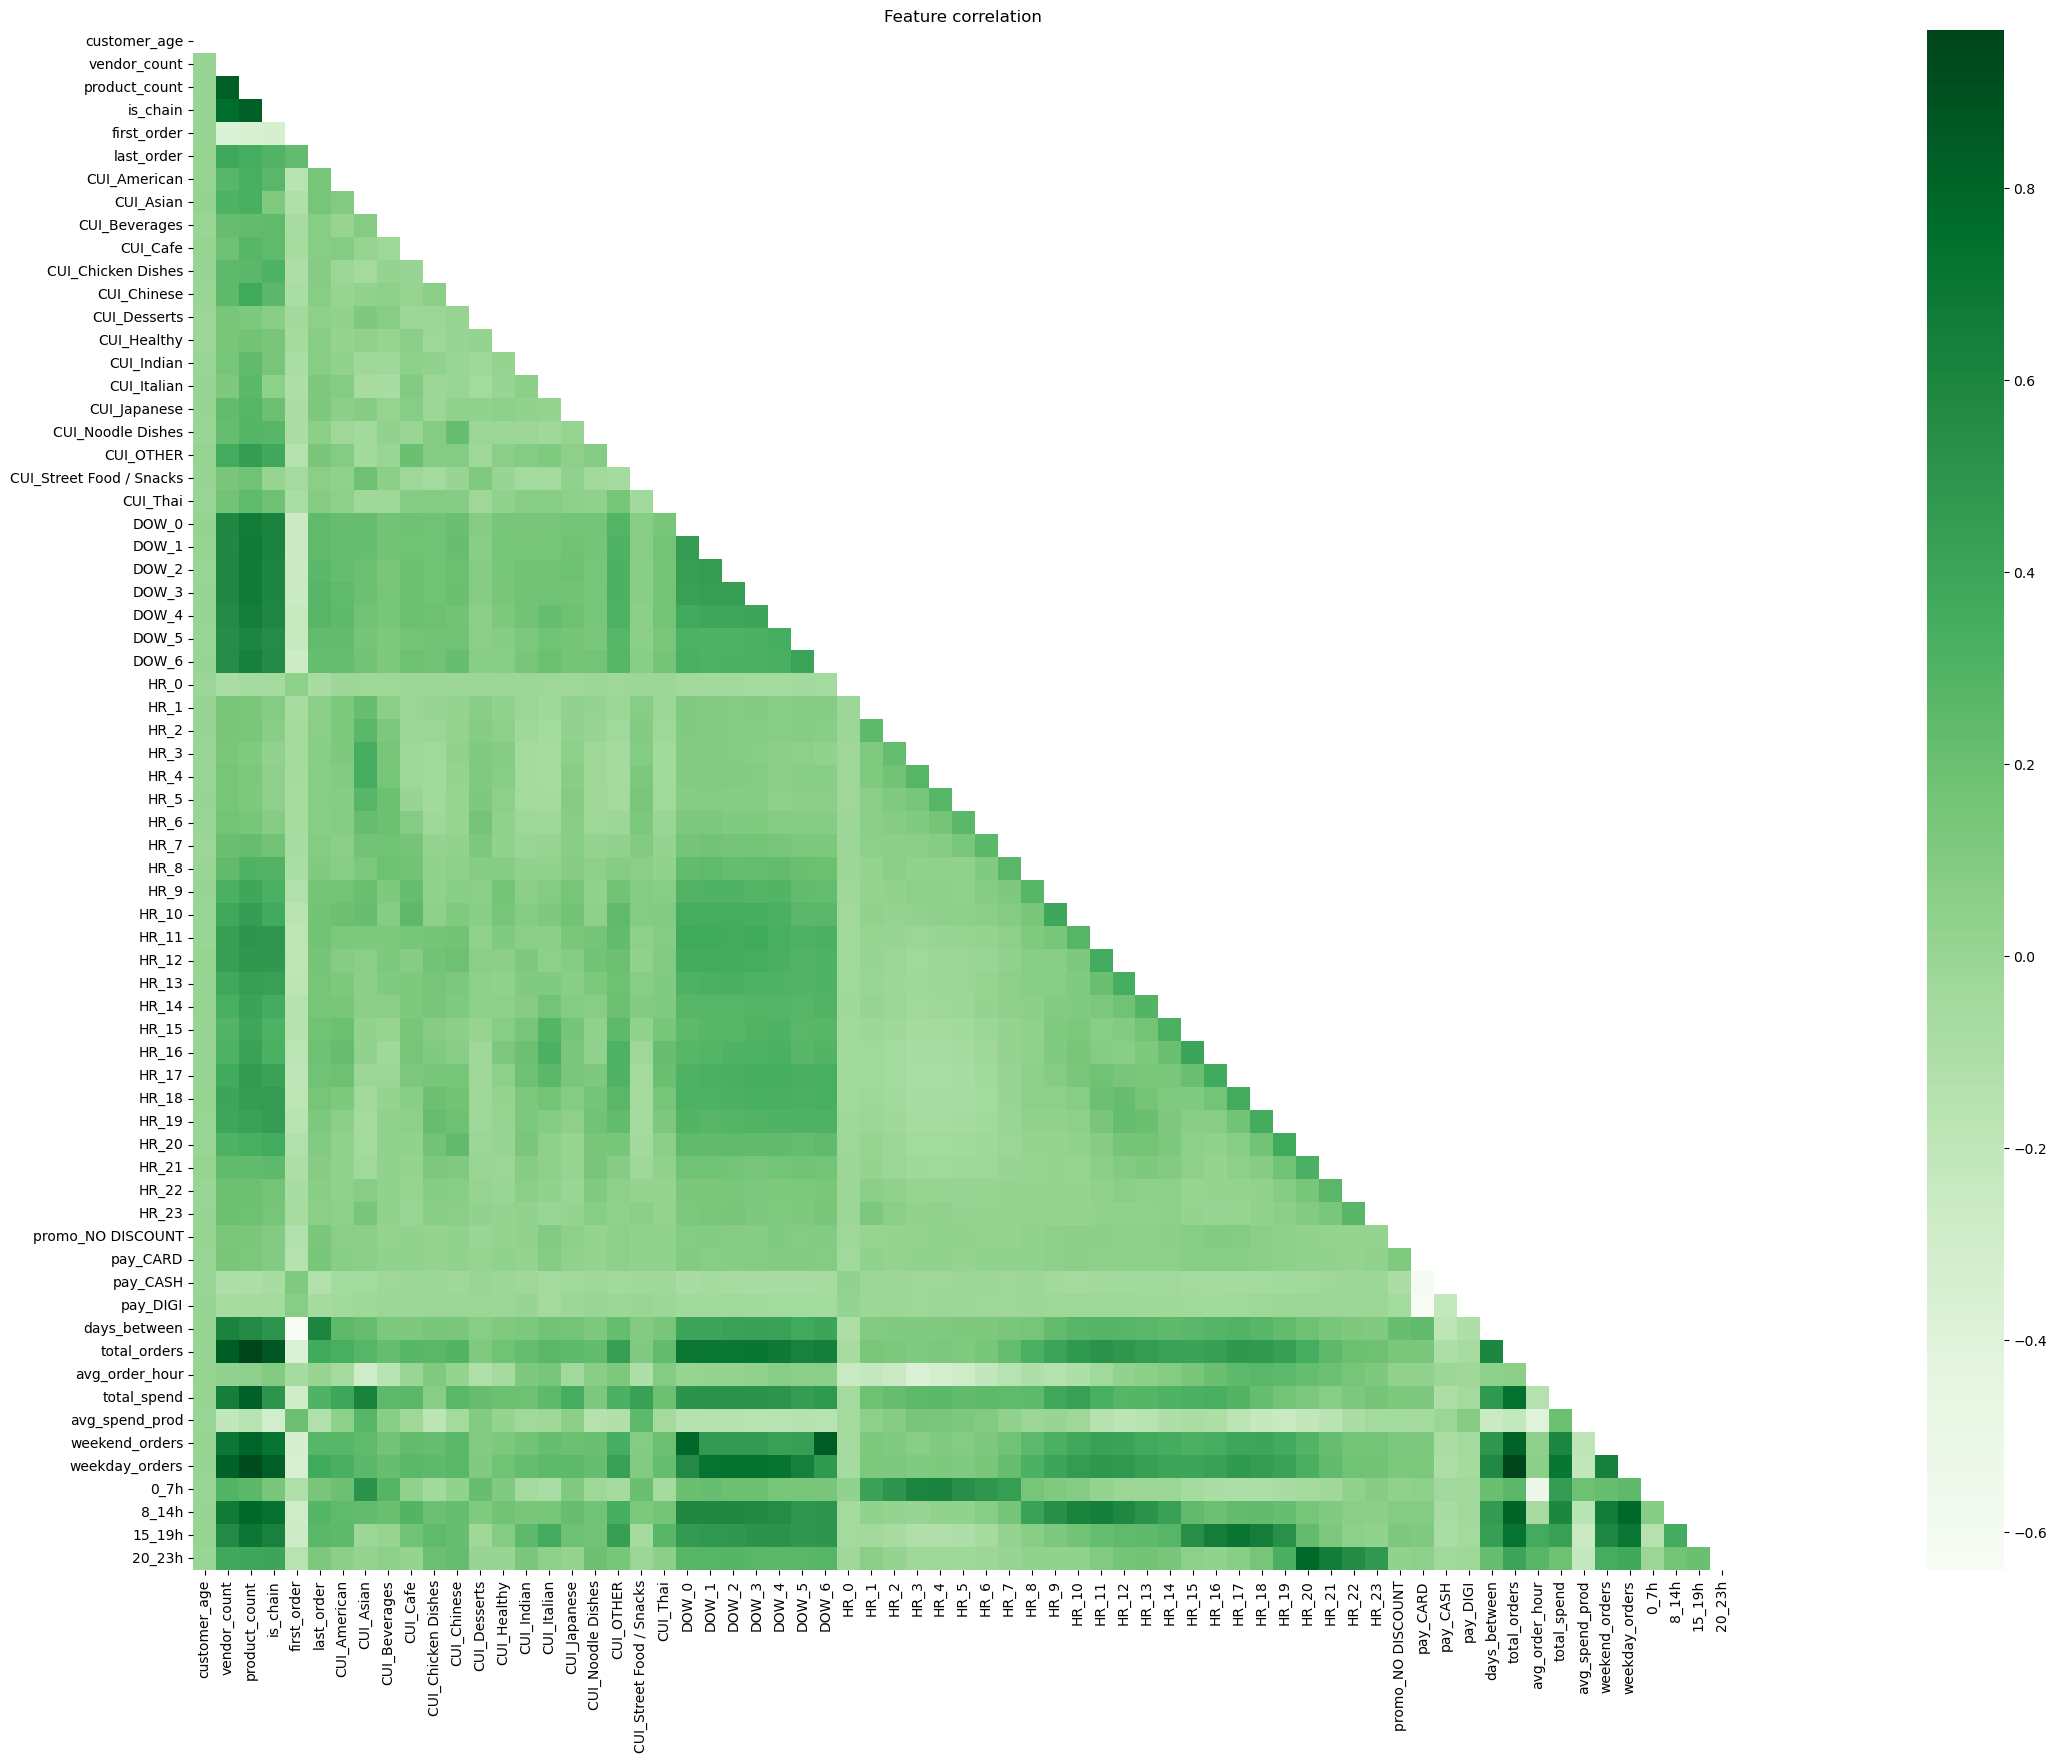

In [28]:
corr = data_num.corr(method="pearson")

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(50, 20))

sns.heatmap(data=corr, annot=True, mask=mask, cmap='Greens', fmt=".2f", square=True)

plt.title('Feature correlation')

plt.show()

Using the threshold of 0.80 (Positive and negative), there are some variables that stand out due to high correlations with several variables. The following are the variables that we can exclude due to high correlations:
* `product_count` is highly correlated to **6** variables which are: `total_orders` (0.97), `weekday_orders` (0.93), `is_chain` (0.83), `vendor_count` (0.83), `total_spend` (0.82) and `weekend_orders` (0.80).
* `total_orders` is highly correlated with **6** variables which are: `product_count` (0.97), `weekday_orders` (0.96), `is_chain` (0.87),`vendor_count` (0.83), `weekend_orders` (0.82) and`8_14h` (0.81).
* `vendor_count` is highly correlated to **3** variables which are: `total_orders` (0.84), `product_count` (0.83) and `weekday_orders` (0.81).
* `is_chain` is highly correlated to **3** variables which are: `total_orders` (0.87), `product_count` (0.83) and `weekday_orders` (0.83).
* `weekday_orders` is highly correlated with **1** variable which is `product_count` (0.93).
* `total_spend` is highly correlated with **1** variable which is `product_count` (0.82).
* `8_14h` is highly correlated with **1** variable which is `total_orders` (0.81).


Above, we can see that most of the correlations involve 2 of the variables: `product_count` and `total_orders`. As such, we should remove these variables. Additionally, we can try to train our models with and without the features `vendor_count` and `is_chain` that show high levels of correlation with 3 other variables.

<br>

## Datasets Overview

In summary we will use the following datasets:


| Dataset Name      | Notes                                                                                          |
|-------------------|------------------------------------------------------------------------------------------------|
| `data_copy`       | No outlier treatment is done                                                                   |
| `data_capped`     | Limiting outliers to fall between the interquartile range                                      |
| `data_log`        | Applying a logarithmic transformation to features that do not follow a log-normal distribution |


<br>

# 3. Data Export

<a href="#top">Top &#129033;</a>

As a final step in this notebook, we must export the treated dataset to be used in the next phase of the project.

In [29]:
#data_copy.to_csv('./data/data_copy_no_modification.csv', index = True)
#data_capped.to_csv('./data/data_capped.csv', index = True)
#data_log.to_csv('./data/data_with_log.csv', index = True)